# Step-1: Bussiness Problem Understanding
- The primary objective is to build a predictive model that accurately predicts, what is the Prediction of Demand for Shared Bikes.

# Step-2: Data Understanding
- shape, size, info
- understand each and every variable(column_name) by applying unique(), value_counts()
- List the discrete and continuous variables separately   
**Descriptive statistics**   
  - For continuous, apply describe()   
  - For discrete, apply value_counts()     
**Explanatory Data Analysis**---EDA   
  - Understanding the raw data by applying pandas,matplotlib,seaborn
  - check and list  
     -missing values   
     -outliers   
     -skewed   
     -discrete nominal and discrete ordinal

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

**Importing/Loading the data**

In [3]:
df=pd.read_csv("bike.csv")
df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df.size

11680

In [5]:
df.shape

(730, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

**Descriptive Statistics**

In [8]:
df["instant"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [9]:
df["instant"].value_counts()

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

In [10]:
df["dteday"].unique()

array(['01-01-2018', '02-01-2018', '03-01-2018', '04-01-2018',
       '05-01-2018', '06-01-2018', '07-01-2018', '08-01-2018',
       '09-01-2018', '10-01-2018', '11-01-2018', '12-01-2018',
       '13-01-2018', '14-01-2018', '15-01-2018', '16-01-2018',
       '17-01-2018', '18-01-2018', '19-01-2018', '20-01-2018',
       '21-01-2018', '22-01-2018', '23-01-2018', '24-01-2018',
       '25-01-2018', '26-01-2018', '27-01-2018', '28-01-2018',
       '29-01-2018', '30-01-2018', '31-01-2018', '01-02-2018',
       '02-02-2018', '03-02-2018', '04-02-2018', '05-02-2018',
       '06-02-2018', '07-02-2018', '08-02-2018', '09-02-2018',
       '10-02-2018', '11-02-2018', '12-02-2018', '13-02-2018',
       '14-02-2018', '15-02-2018', '16-02-2018', '17-02-2018',
       '18-02-2018', '19-02-2018', '20-02-2018', '21-02-2018',
       '22-02-2018', '23-02-2018', '24-02-2018', '25-02-2018',
       '26-02-2018', '27-02-2018', '28-02-2018', '01-03-2018',
       '02-03-2018', '03-03-2018', '04-03-2018', '05-03

In [11]:
df["dteday"].value_counts()

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

In [12]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
df["season"].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [14]:
df["yr"].unique()

array([0, 1], dtype=int64)

In [15]:
df["yr"].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [16]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
df["mnth"].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [18]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [19]:
df["weekday"].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [20]:
df["workingday"].unique()

array([0, 1], dtype=int64)

In [21]:
df["workingday"].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [22]:
df["weathersit"].unique()

array([2, 1, 3], dtype=int64)

In [23]:
df["weathersit"].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [24]:
df["temp"].unique()

array([14.110847 , 14.902598 ,  8.050924 ,  8.2      ,  9.305237 ,
        8.378268 ,  8.057402 ,  6.765    ,  5.671653 ,  6.184153 ,
        6.932731 ,  7.081807 ,  6.59567  ,  9.566653 ,  9.498347 ,
        7.209153 ,  8.883347 , 11.979134 , 10.728347 ,  7.2775   ,
        2.4243464,  3.9573897,  3.9930433,  9.162598 ,  8.9175   ,
        7.995    ,  8.342598 ,  8.877402 ,  7.414153 ,  7.879134 ,
       10.66     ,  7.665237 ,  8.663464 , 11.719153 , 11.138347 ,
        9.054153 ,  5.526103 ,  5.918268 ,  7.752731 ,  9.1225   ,
       12.977402 , 17.015    , 10.909567 , 13.048701 , 17.869153 ,
       21.388347 , 16.365847 , 11.693897 , 12.436653 ,  7.471102 ,
        9.091299 , 12.121732 , 14.938268 , 11.5825   , 14.082598 ,
       16.698193 , 10.933347 , 13.735    ,  8.131653 , 15.750847 ,
       15.437402 , 10.731299 , 11.9925   , 12.129153 , 15.952731 ,
       13.495847 , 15.758268 , 13.333897 , 13.013031 , 14.973897 ,
       22.14     , 19.3725   , 13.6325   , 17.647835 , 18.1083

In [25]:
df["temp"].value_counts()

temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64

In [26]:
df["atemp"].unique()

array([18.18125 , 17.68695 ,  9.47025 , 10.6061  , 11.4635  , 11.66045 ,
       10.44195 ,  8.1127  ,  5.80875 ,  7.5444  ,  9.5732  ,  8.02365 ,
        7.54415 ,  9.42065 , 12.4056  , 11.71085 ,  8.83855 , 11.61665 ,
       14.9211  , 12.7525  ,  7.89165 ,  3.95348 ,  4.941955,  5.8965  ,
       11.7263  , 10.18    , 10.985   , 11.16585 , 10.6063  , 12.5161  ,
        9.3125  , 11.7265  , 12.72085 ,  8.8939  , 11.42935 , 12.1529  ,
       14.58355 , 15.1829  ,  9.9123  ,  7.21415 ,  7.4774  , 10.67545 ,
       11.6477  , 16.20565 , 19.9175  , 12.7137  , 15.81    , 21.4329  ,
       25.59915 , 19.5702  , 13.8665  , 14.20375 ,  9.30165 , 12.28585 ,
       14.45955 , 17.52305 , 14.1096  , 17.55545 , 20.0059  , 13.19395 ,
       16.00355 , 10.00665 , 12.78395 , 18.93895 , 18.3126  , 11.92305 ,
       15.12    , 14.3304  , 19.2834  , 15.25    , 16.2875  , 19.00455 ,
       16.6     , 15.9089  , 18.3465  , 20.51665 , 26.35045 , 23.32625 ,
       20.48675 , 22.0321  , 16.89695 , 13.54165 , 

In [27]:
df["atemp"].value_counts()

atemp
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: count, Length: 689, dtype: int64

In [28]:
df["hum"].unique()

array([80.5833, 69.6087, 43.7273, 59.0435, 43.6957, 51.8261, 49.8696,
       53.5833, 43.4167, 48.2917, 68.6364, 59.9545, 47.0417, 53.7826,
       49.875 , 48.375 , 53.75  , 86.1667, 74.1739, 53.8333, 45.7083,
       40.    , 43.6522, 49.1739, 61.6957, 86.25  , 68.75  , 79.3043,
       65.1739, 72.2174, 60.375 , 82.9565, 77.5417, 43.7826, 58.5217,
       92.9167, 56.8333, 73.8333, 53.7917, 49.4783, 43.7391, 50.6364,
       54.4167, 45.7391, 37.5833, 31.4348, 42.3478, 50.5   , 51.6667,
       18.7917, 40.7826, 60.5   , 57.7778, 42.3043, 69.7391, 71.2174,
       68.    , 87.6364, 53.5   , 44.9583, 31.8333, 61.0417, 78.9167,
       94.8261, 55.1304, 42.0833,  0.    , 64.9565, 59.4583, 52.7391,
       49.6957, 65.5652, 77.6522, 60.2917, 52.5217, 37.9167, 47.375 ,
       73.7391, 62.4583, 83.9565, 49.5   , 39.4167, 49.3913, 30.2174,
       31.4167, 64.6667, 91.8333, 68.625 , 65.375 , 48.    , 42.625 ,
       64.2083, 47.0833, 83.625 , 87.75  , 85.75  , 71.6956, 73.9167,
       81.9167, 54.0

In [29]:
df["hum"].value_counts()

hum
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: count, Length: 594, dtype: int64

In [30]:
df["windspeed"].unique()

array([10.749882 , 16.652113 , 16.636703 , 10.739832 , 12.5223   ,
        6.0008684, 11.304642 , 17.875868 , 24.25065  , 14.958889 ,
        8.182844 , 20.410009 , 20.167    ,  8.478716 , 10.583521 ,
       12.625011 , 12.999139 ,  9.833925 , 13.957239 , 13.125568 ,
       23.667214 , 11.52199  , 16.5222   , 10.60811  ,  8.696332 ,
       19.68795  ,  7.627079 ,  8.2611   ,  9.739455 ,  4.9568342,
       12.541864 ,  3.565271 , 17.708636 , 18.609384 ,  8.565213 ,
       10.792293 ,  9.5006   ,  3.0423561, 12.652213 , 14.869645 ,
        7.27285  , 13.625589 , 17.479161 , 27.999836 , 19.522058 ,
       16.869997 , 15.416968 , 17.749975 , 34.000021 , 14.956745 ,
       20.625682 , 13.110761 ,  6.305571 , 16.783232 , 23.218113 ,
       12.500257 ,  8.391616 , 19.408962 , 14.500475 , 20.624811 ,
       15.125518 , 13.624182 , 16.875357 , 23.000229 , 22.870584 ,
        8.08355  , 14.75005  , 17.545759 , 15.60899  , 14.791925 ,
       18.130468 ,  9.174042 , 12.348703 , 13.608839 , 14.0417

In [31]:
df["windspeed"].value_counts()

windspeed
9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: count, Length: 649, dtype: int64

In [32]:
df["casual"].unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [33]:
df["casual"].value_counts()

casual
120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: count, Length: 605, dtype: int64

In [34]:
df["registered"].unique()

array([ 654,  670, 1229, 1454, 1518, 1362,  891,  768, 1280, 1220, 1137,
       1368, 1367, 1026,  953,  883,  674, 1572, 1844, 1468,  888,  836,
       1330, 1799,  472,  416, 1129,  975,  956, 1459, 1313, 1489, 1620,
        905, 1269, 1592, 1466, 1552, 1491, 1597, 1184, 1192, 1705, 1675,
       1897, 2216, 2348, 1103, 1173,  912, 1376, 1778, 1707, 1341, 1545,
       1708, 1365, 1714, 1903, 1562, 1730, 1437,  491, 1628, 1817, 1700,
        577, 1408, 1435, 1687, 1767, 1871, 2320, 2355, 1693, 1424, 1676,
       2243, 1918, 1699, 1910, 1515, 1221, 1806, 2108, 1506, 1920, 1354,
       1598, 2381, 2395, 2570, 1299, 1576, 2493, 1777, 1953, 2738, 2484,
       2186, 2760, 2795, 3331, 3444, 2574, 2481, 3300, 3722, 3325, 3489,
       3717, 3347, 2213, 3554, 3848, 2378, 3819, 3714, 3102, 2932, 3698,
       4109, 3632, 4169, 3413, 2507, 2971, 3185, 3445, 3319, 3840, 4008,
       3547, 3084, 3438, 3833, 4238, 3919, 3808, 2757, 2433, 2549, 3309,
       3461, 4232, 4414, 3473, 3221, 3875, 4070, 37

In [35]:
df["registered"].value_counts()

registered
4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: count, Length: 678, dtype: int64

In [36]:
df["cnt"].unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

In [37]:
df["cnt"].value_counts()

cnt
5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: count, Length: 695, dtype: int64

In [39]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [40]:
continuous=["instant","dteday","temp","atemp","hum","windspeed","casual","registered","cnt"]
discrte_categorical=["season","yr","mnth","holiday","weekday","workingday","weathersit"]

In [41]:
df[continuous].describe()

instant        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000   20.319259   23.726322   62.765175   12.763620   
std    210.877136    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%    183.250000   13.811885   16.889713   52.000000    9.041650   
50%    365.500000   20.465826   24.368225   62.625000   12.125325   
75%    547.750000   26.880615   30.445775   72.989575   15.625589   
max    730.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

**Explanatory Data Analysis**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**continuous**

**instant**
- Histogram
- Boxplot

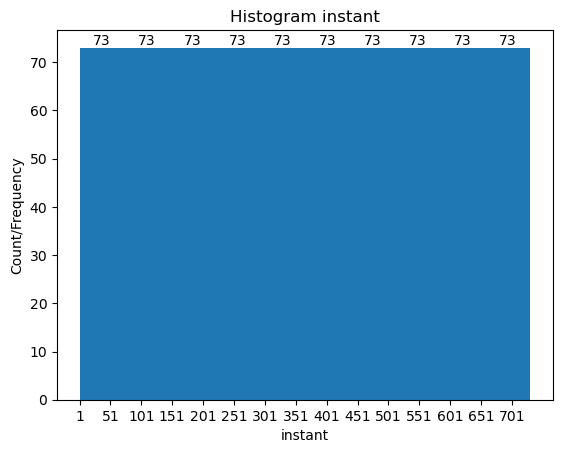

In [43]:
# instant-----Histogram
n,bins,patches=plt.hist(df["instant"],bins=10,range=(1,731))
plt.bar_label(patches)                                             # count of each bar
plt.xlabel("instant")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                      # set the label for the y-axis
plt.title("Histogram instant")                                     # set title for the plot
plt.xticks(list(range(1,731,50)))                                  # x-axis values presentation
plt.show()

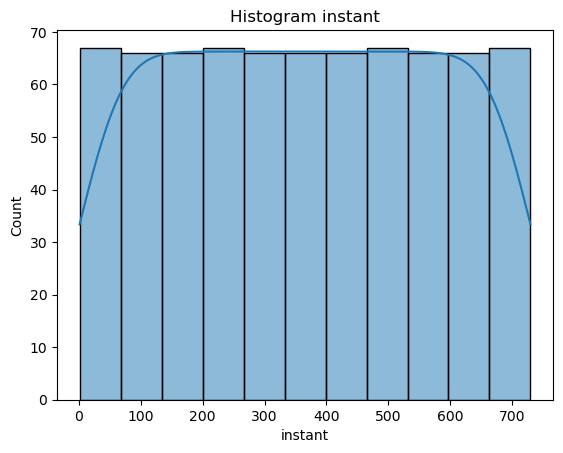

In [44]:
# GRE-----Histogram
plt.title("Histogram instant")

sns.histplot(df["instant"],kde=True)
plt.show()

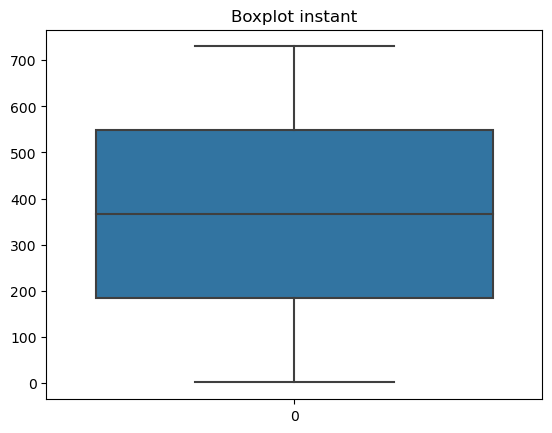

In [45]:
# BOXPLOT
plt.title("Boxplot instant")

sns.boxplot(df["instant"])
plt.show()

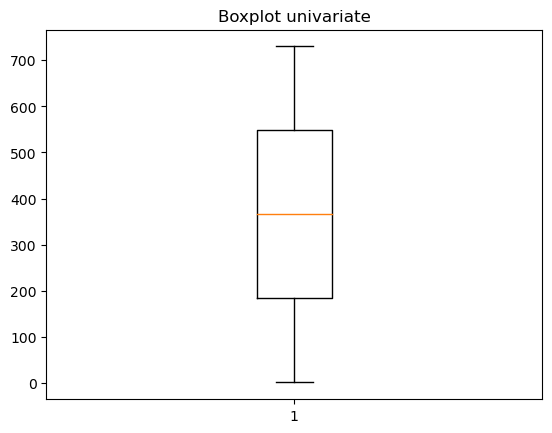

In [46]:
# Boxplot-----instant
plt.title("Boxplot univariate")

plt.boxplot(df["instant"])
plt.show()

**temp**
- Histogram
- Boxplot

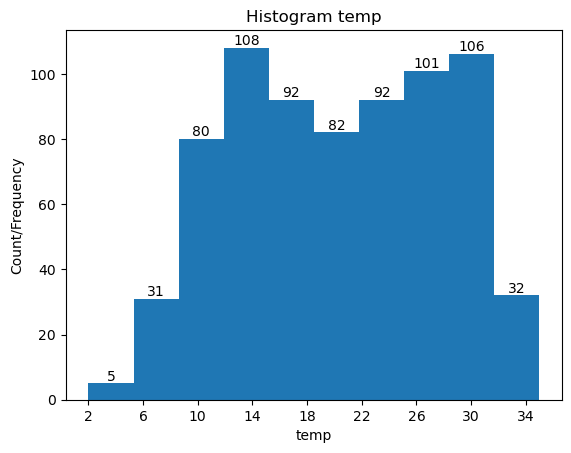

In [47]:
#dteday-----Histogram
n,bins,patches=plt.hist(df["temp"],bins=10,range=(2,35))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("temp")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram temp")                                     # set title for the plot
plt.xticks(list(range(2,36,4)))                               # x-axis values presentation
plt.show()

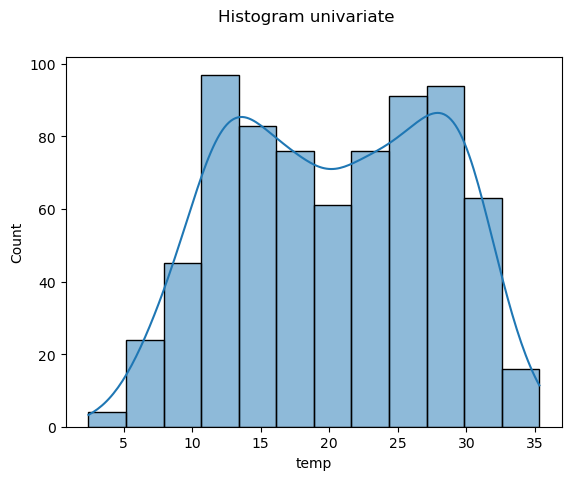

In [48]:
# Histogram-----temp
plt.suptitle("Histogram univariate")

sns.histplot(df["temp"],kde=True)
plt.show()

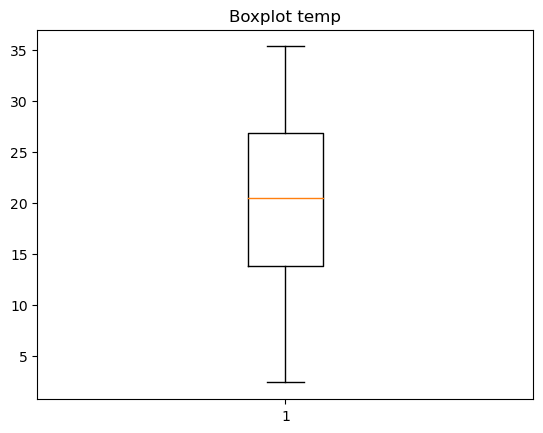

In [49]:
# temp-----Boxplot
plt.title("Boxplot temp")

plt.boxplot(df["temp"])
plt.show()

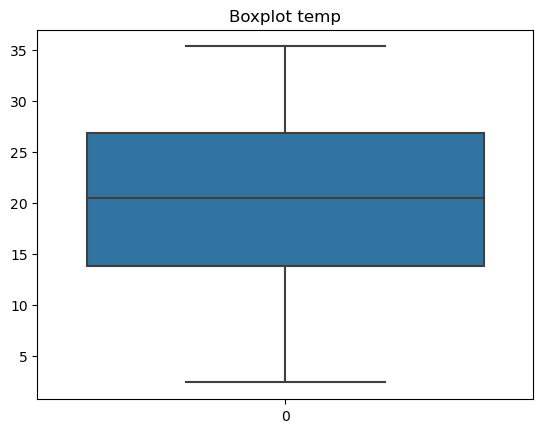

In [50]:
# temp-----Boxplot
plt.title("Boxplot temp")

sns.boxplot(df["temp"])
plt.show()

**atemp**
- Histogram
- Boxplot

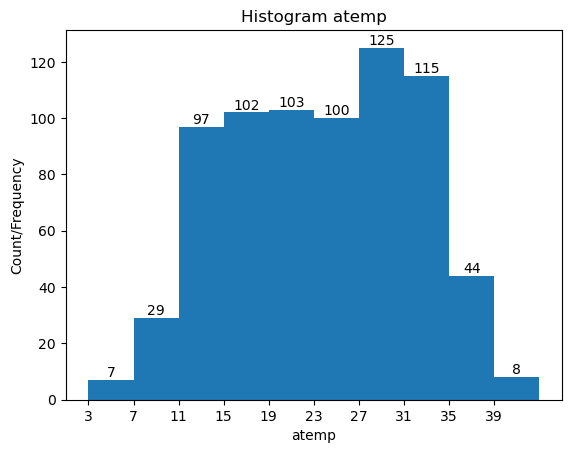

In [51]:
# atemp-----Histogram
n,bins,patches=plt.hist(df["atemp"],bins=10,range=(3,43))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("atemp")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram atemp")                                     # set title for the plot
plt.xticks(list(range(3,43,4)))                               # x-axis values presentation
plt.show()

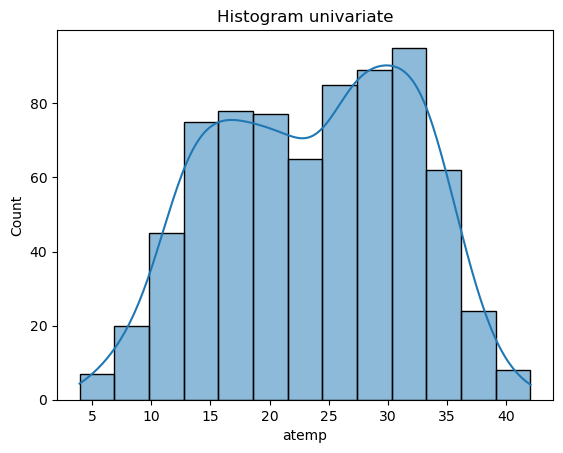

In [52]:
# atemp-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["atemp"],kde=True)
plt.show()

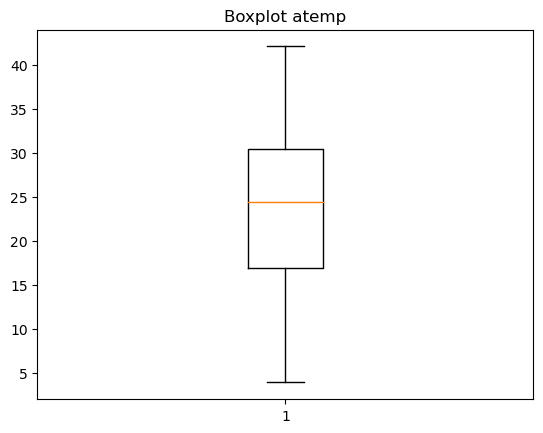

In [53]:
# atemp-----Boxplot
plt.title("Boxplot atemp")

plt.boxplot(df["atemp"])
plt.show()

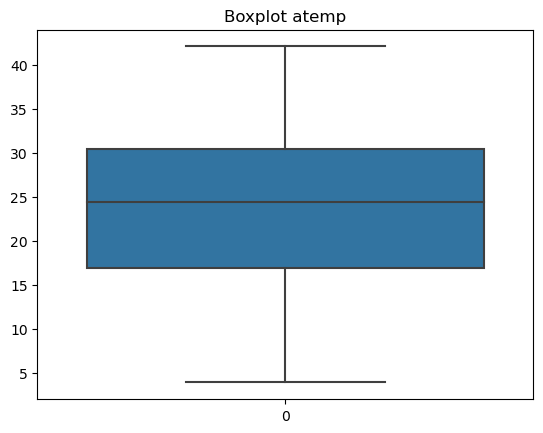

In [54]:
# atemp-----Boxplot
plt.title("Boxplot atemp")

sns.boxplot(df["atemp"])
plt.show()

**hum**
- Histogram
- Boxplot

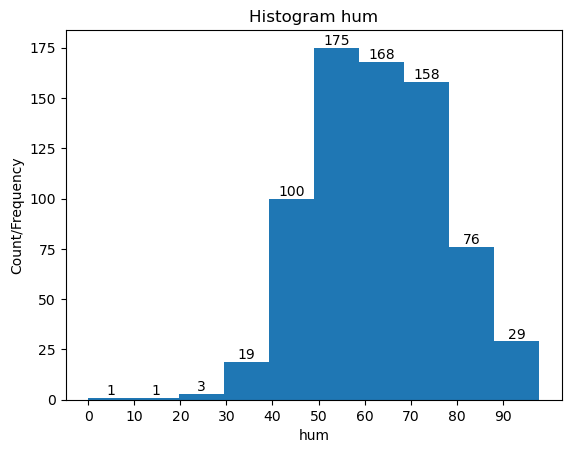

In [55]:
# hum-----Histogram
n,bins,patches=plt.hist(df["hum"],bins=10,range=(0,98))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("hum")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram hum")                                     # set title for the plot
plt.xticks(list(range(0,98,10)))                               # x-axis values presentation
plt.show()

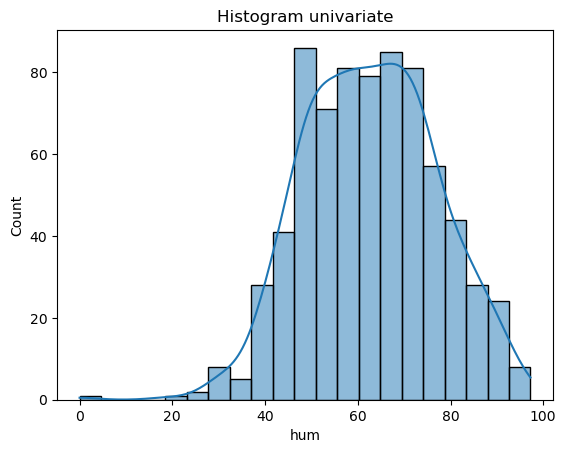

In [56]:
# hum-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["hum"],kde=True)
plt.show()

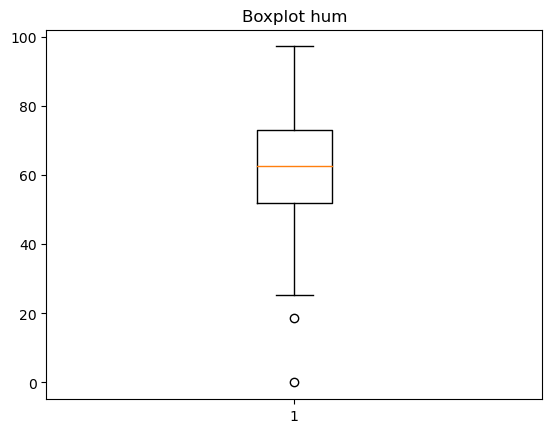

In [57]:
# hum-----Boxplot
plt.title("Boxplot hum")

plt.boxplot(df["hum"])
plt.show()

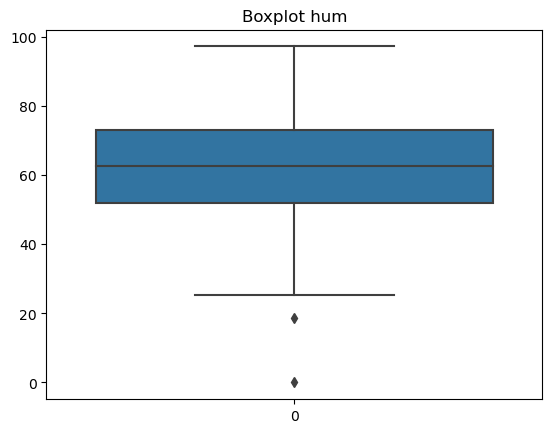

In [58]:
# hum-----Boxplot
plt.title("Boxplot hum")

sns.boxplot(df["hum"])
plt.show()

**windspeed**
- Histogram
- Boxplot

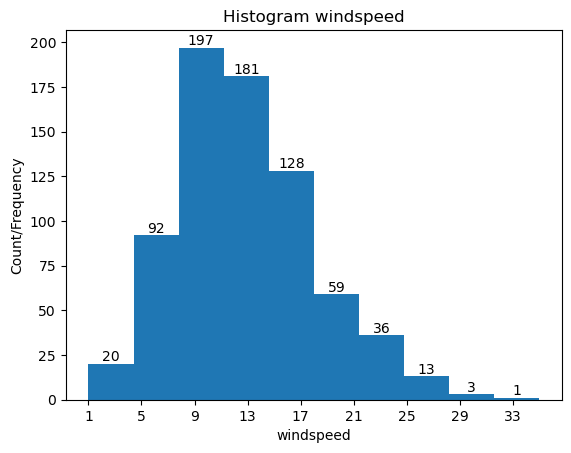

In [59]:
# windspeed-----Histogram
n,bins,patches=plt.hist(df["windspeed"],bins=10,range=(1,35))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("windspeed")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram windspeed")                                     # set title for the plot
plt.xticks(list(range(1,35,4)))                               # x-axis values presentation
plt.show()

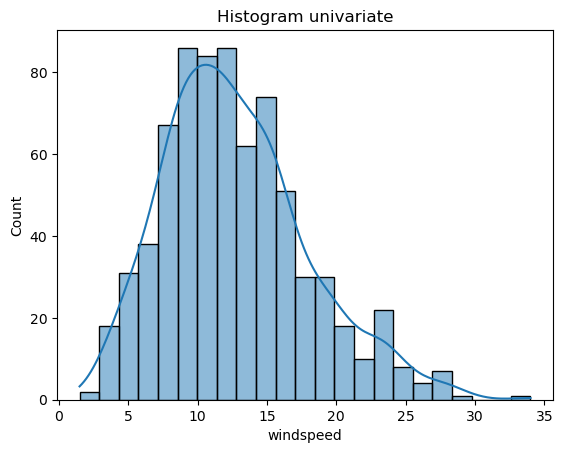

In [60]:
# windspeed-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["windspeed"],kde=True)
plt.show()

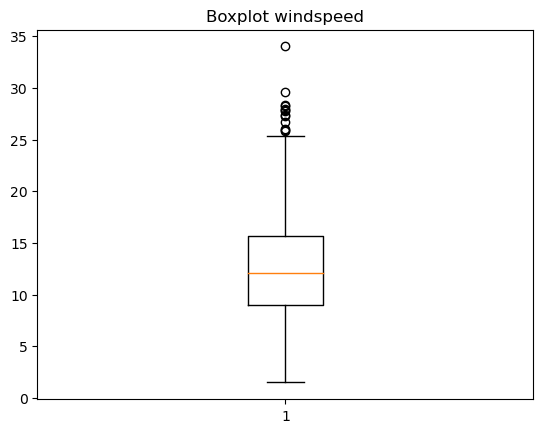

In [61]:
# windspeed-----Boxplot
plt.title("Boxplot windspeed")

plt.boxplot(df["windspeed"])
plt.show()

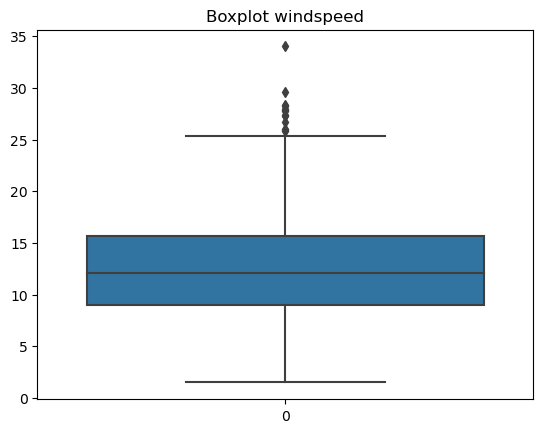

In [62]:
# windspeed-----Boxplot
plt.title("Boxplot windspeed")

sns.boxplot(df["windspeed"])
plt.show()

**casual**
- Histogram
- Boxplot

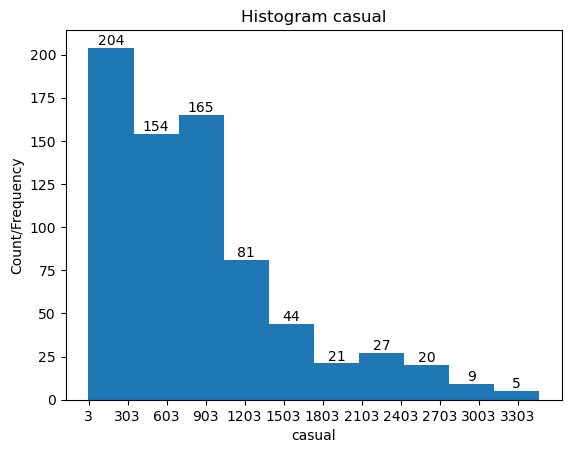

In [63]:
# casual-----Histogram
n,bins,patches=plt.hist(df["casual"],bins=10,range=(2,3470))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("casual")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram casual")                                     # set title for the plot
plt.xticks(list(range(3,3470,300)))                               # x-axis values presentation
plt.show()

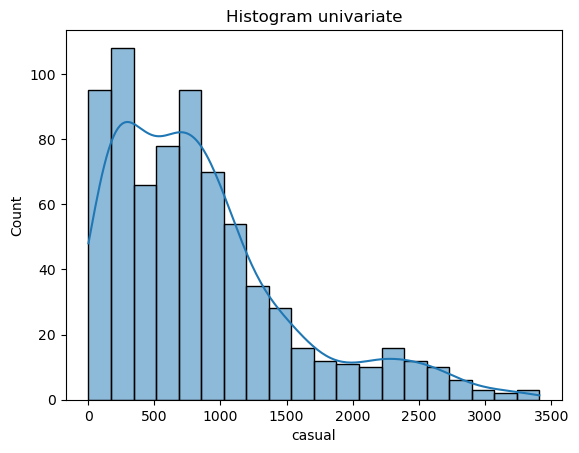

In [64]:
# casual-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["casual"],kde=True)
plt.show()

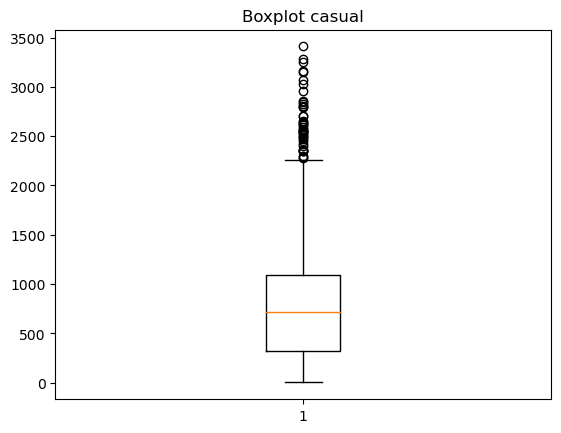

In [65]:
# casual-----Boxplot
plt.title("Boxplot casual")

plt.boxplot(df["casual"])
plt.show()

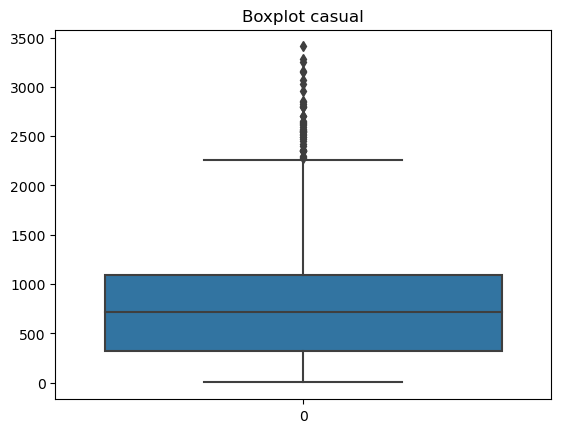

In [66]:
# casual-----Boxplot
plt.title("Boxplot casual")

sns.boxplot(df["casual"])
plt.show()

**registered**
- Histogram
- Boxplot

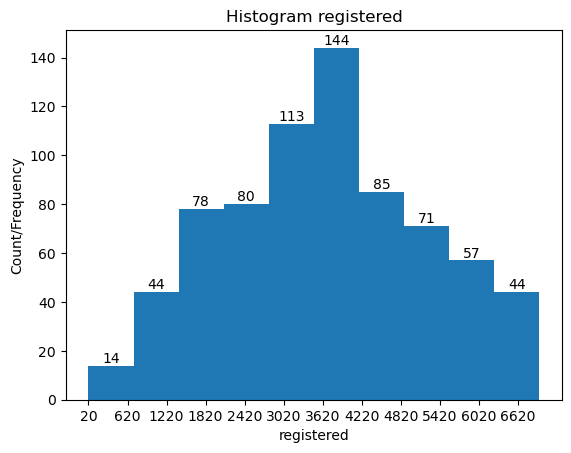

In [67]:
# registered-----Histogram
n,bins,patches=plt.hist(df["registered"],bins=10,range=(20,6946))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("registered")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram registered")                                     # set title for the plot
plt.xticks(list(range(20,6946,600)))                               # x-axis values presentation
plt.show()

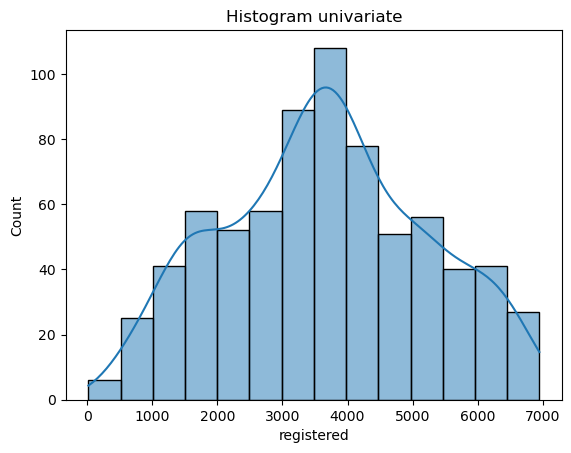

In [68]:
# registered-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["registered"],kde=True)
plt.show()

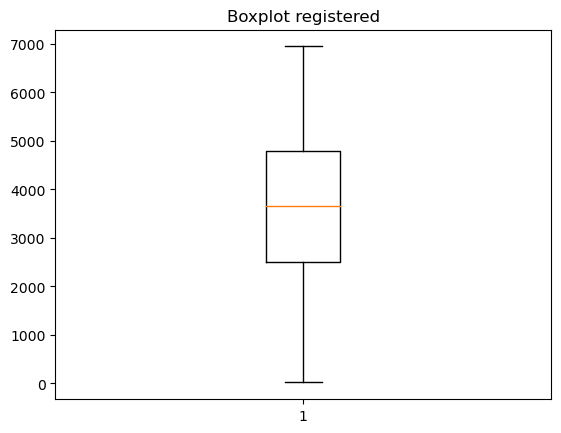

In [69]:
# registered-----Boxplot
plt.title("Boxplot registered")

plt.boxplot(df["registered"])
plt.show()

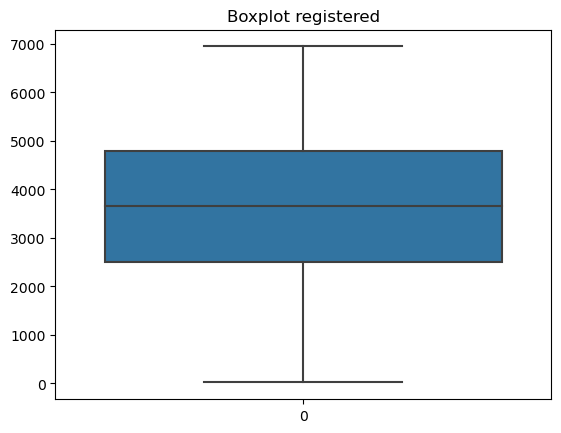

In [70]:
# registered-----Boxplot
plt.title("Boxplot registered")

sns.boxplot(df["registered"])
plt.show()


**cnt**
- Histogram
- Boxplot

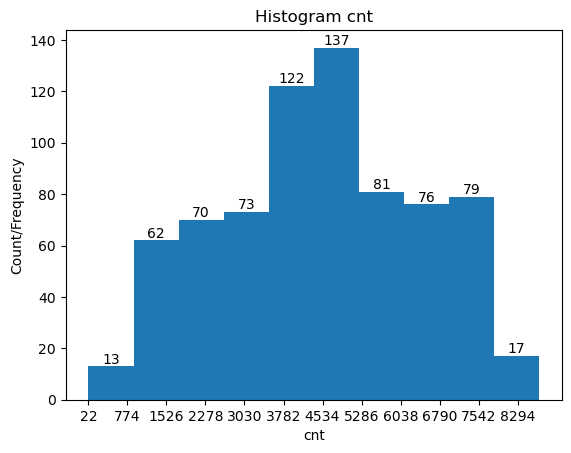

In [71]:
# cnt-----Histogram
n,bins,patches=plt.hist(df["cnt"],bins=10,range=(22,8714))
plt.bar_label(patches)                                          # count of each bar
plt.xlabel("cnt")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                   # set the label for the y-axis
plt.title("Histogram cnt")                                     # set title for the plot
plt.xticks(list(range(22,8714,752)))                               # x-axis values presentation
plt.show()

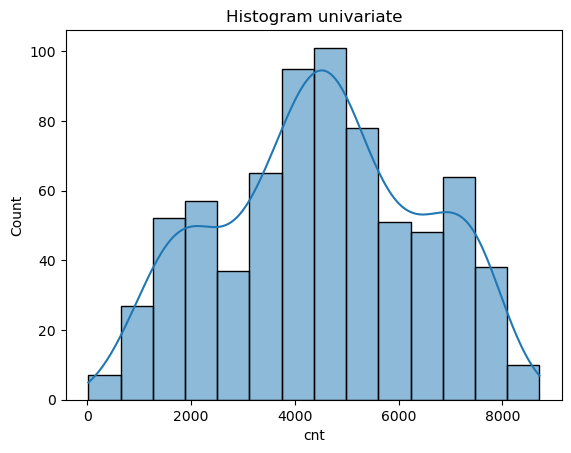

In [72]:
# cnt-----Histogram
plt.title("Histogram univariate")

sns.histplot(df["cnt"],kde=True)
plt.show()

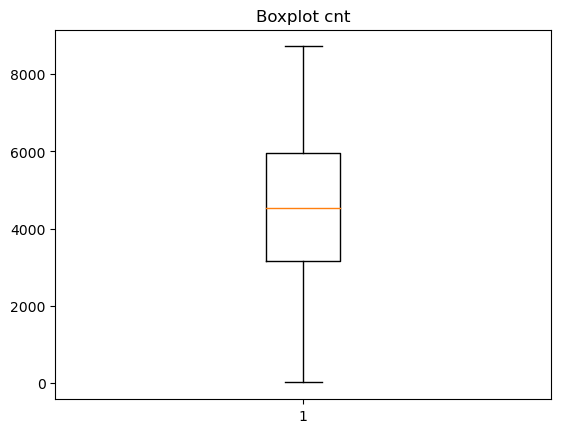

In [73]:
# cnt-----Boxplot
plt.title("Boxplot cnt")

plt.boxplot(df["cnt"])
plt.show()

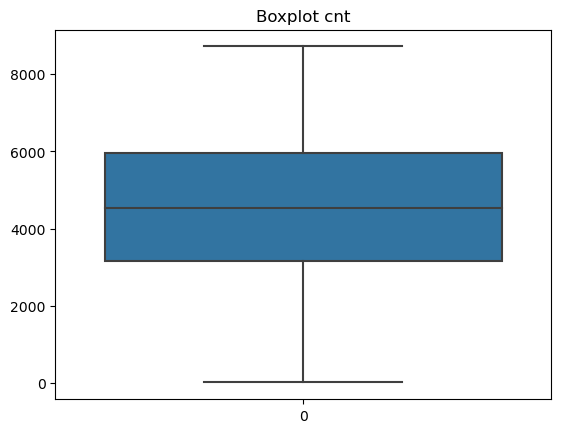

In [74]:
# cnt-----Boxplot
plt.title("Boxplot cnt")

sns.boxplot(df["cnt"])
plt.show()

**instant-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

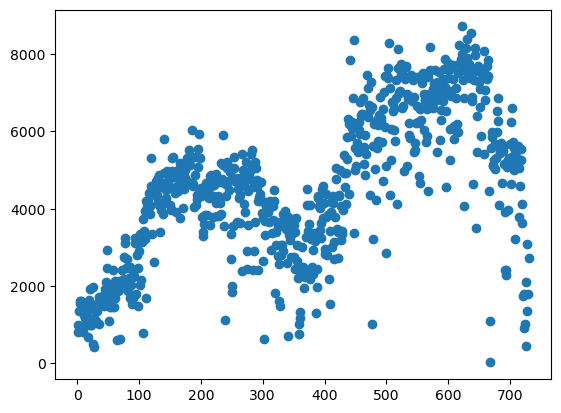

In [75]:
# instant,cnt-----scatterplot
plt.scatter(x=df["instant"],y=df["cnt"])
plt.show()

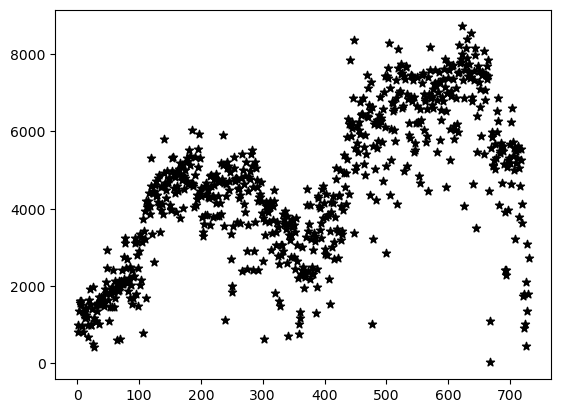

In [76]:
# instant,cnt-----scatterplot
plt.scatter(x=df["instant"],y=df["cnt"],marker="*",color="black")
plt.show()

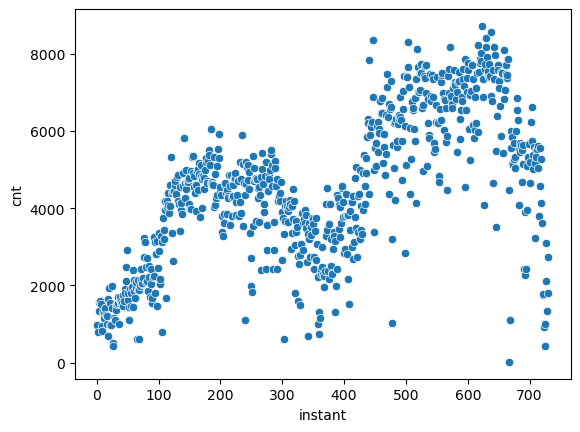

In [77]:
# instant,cnt-----scatterplot
sns.scatterplot(x=df["instant"],y=df["cnt"])
plt.show()

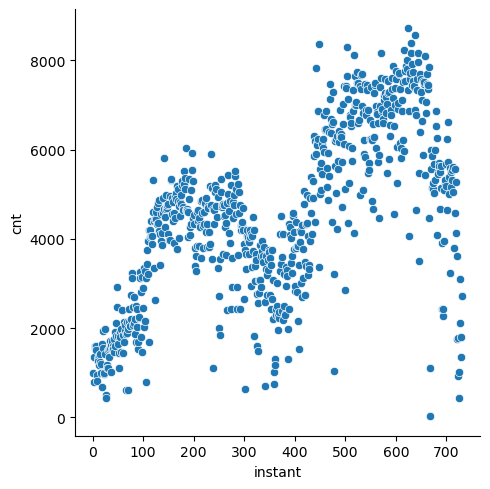

In [78]:
# instant,cnt-----relplot
sns.relplot(x=df["instant"],y=df["cnt"])
plt.show()

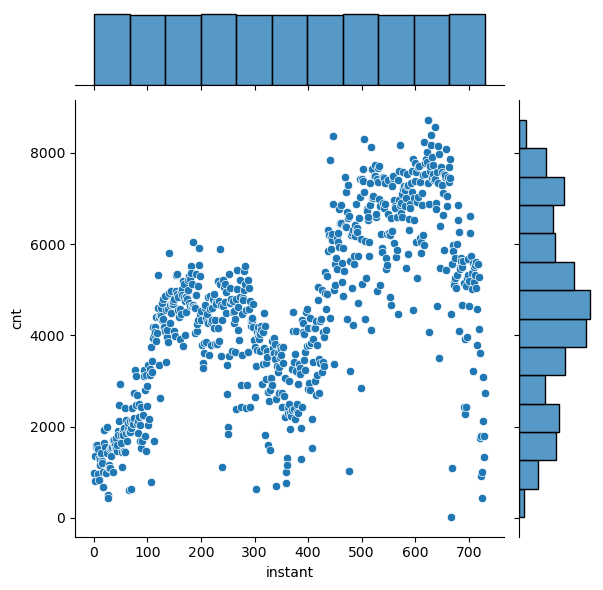

In [79]:
# instant,cnt-----jointplot
sns.jointplot(x=df["instant"],y=df["cnt"])
plt.show()

**dteday-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

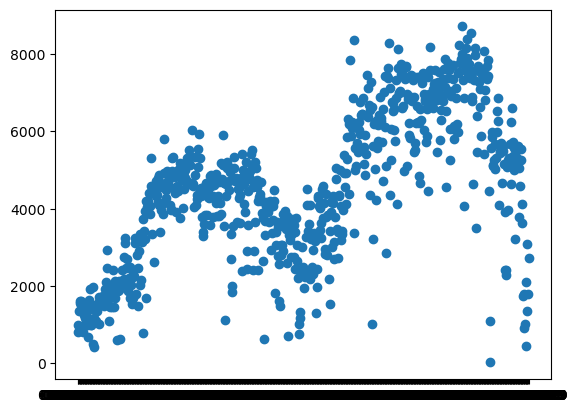

In [80]:
# dteday,cnt-----scatterplot
plt.scatter(x=df["dteday"],y=df["cnt"])
plt.show()

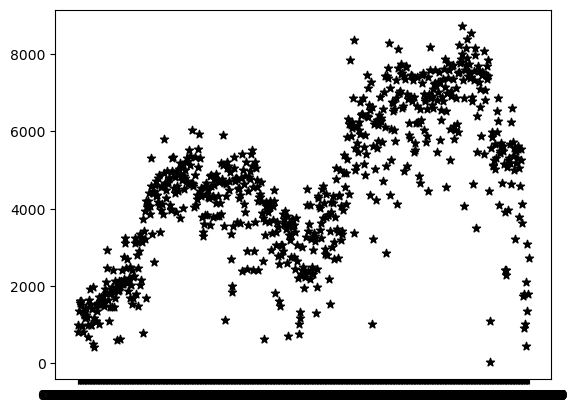

In [81]:
# dteday,cnt-----scatterplot
plt.scatter(x=df["dteday"],y=df["cnt"],marker="*",color="black")
plt.show()

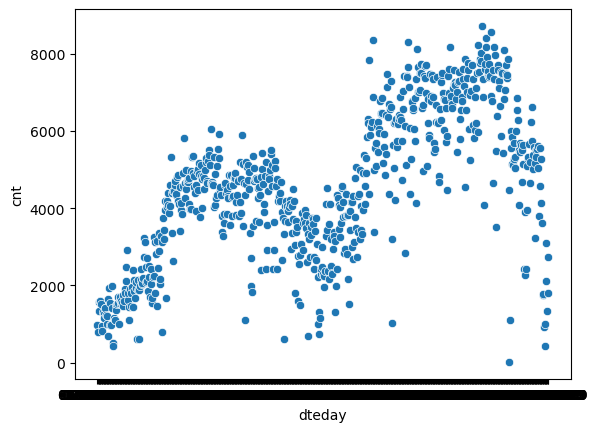

In [82]:
# dteday,cnt-----scatterplot
sns.scatterplot(x=df["dteday"],y=df["cnt"])
plt.show()

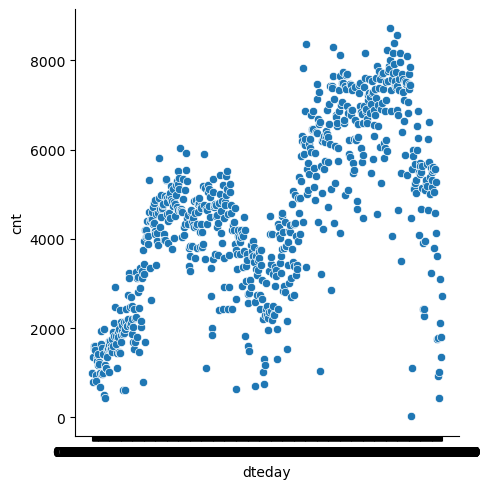

In [83]:
# dteday,cnt-----relplot
sns.relplot(x=df["dteday"],y=df["cnt"])
plt.show()

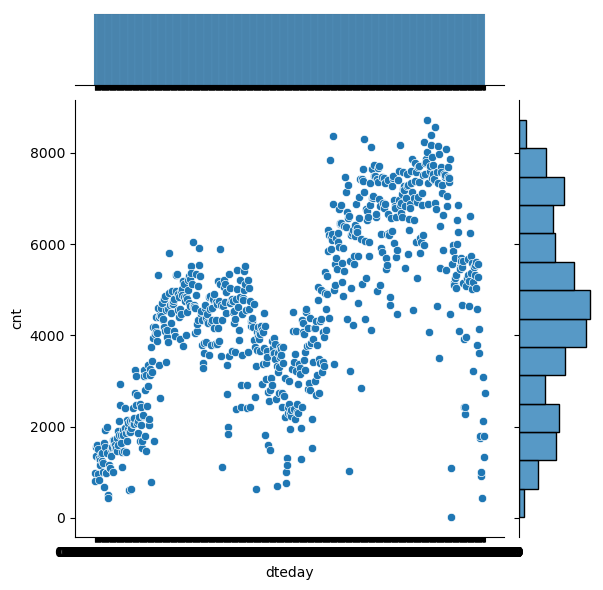

In [84]:
# dteday,cnt-----jointplot
sns.jointplot(x=df["dteday"],y=df["cnt"])
plt.show()

**temp-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

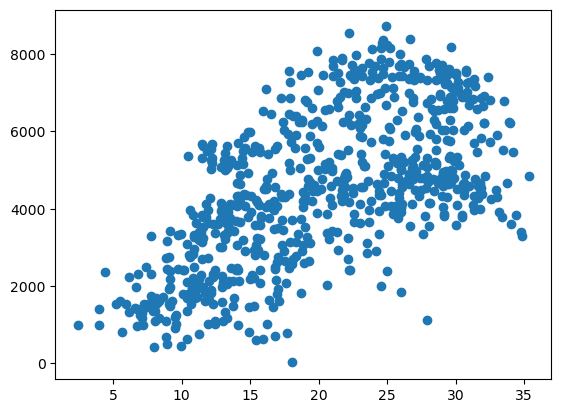

In [85]:
# temp,cnt-----scatterplot
plt.scatter(x=df["temp"],y=df["cnt"])
plt.show()

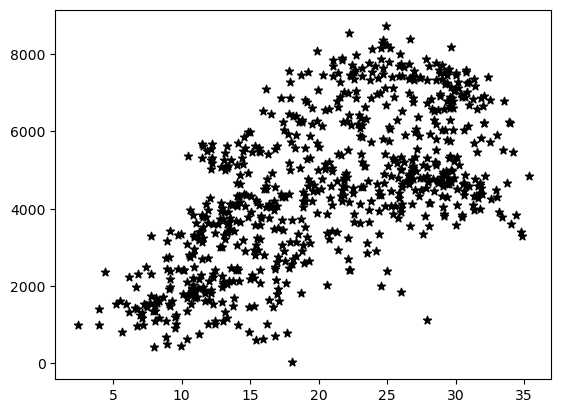

In [86]:
# temp,cnt-----scatterplot
plt.scatter(x=df["temp"],y=df["cnt"],marker="*",color="black")
plt.show()

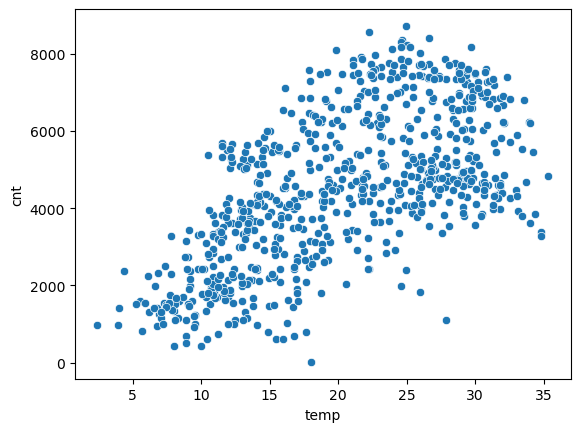

In [87]:
# temp,cnt-----scatterplot
sns.scatterplot(x=df["temp"],y=df["cnt"])
plt.show()

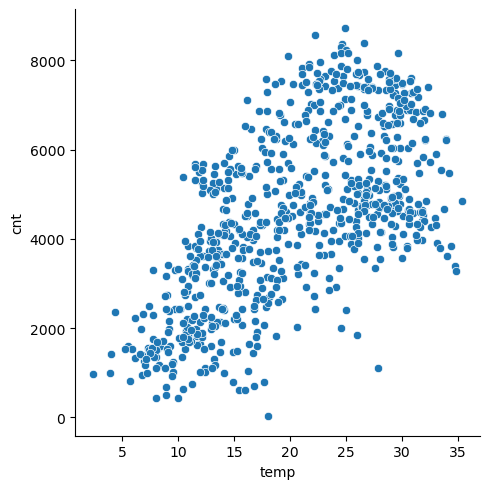

In [88]:
# temp,cnt-----relplot
sns.relplot(x=df["temp"],y=df["cnt"])
plt.show()

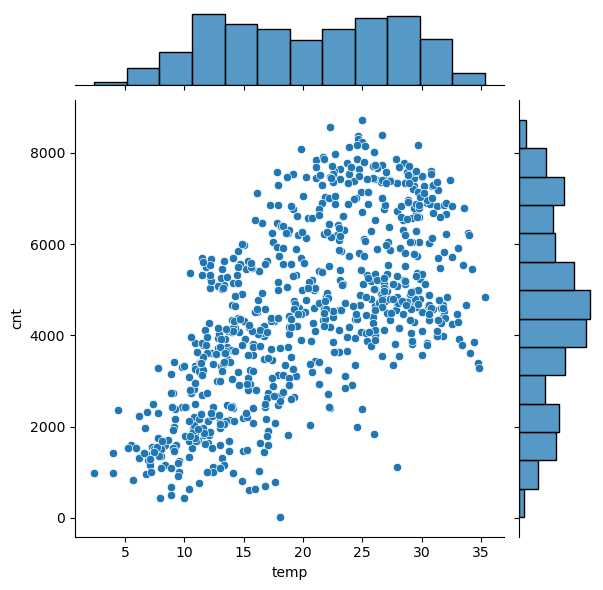

In [89]:
# temp,cnt-----jointplot
sns.jointplot(x=df["temp"],y=df["cnt"])
plt.show()

**atemp-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

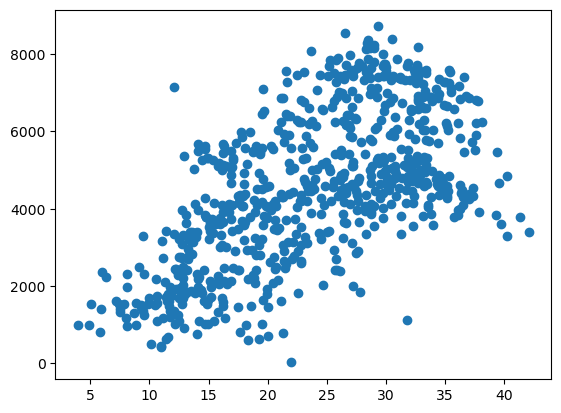

In [90]:
# atemp,cnt-----scatterplot
plt.scatter(x=df["atemp"],y=df["cnt"])
plt.show()

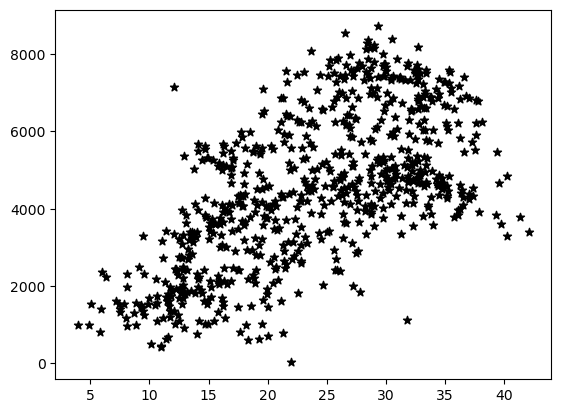

In [91]:
# atemp,cnt-----scatterplot
plt.scatter(x=df["atemp"],y=df["cnt"],marker="*",color="black")
plt.show()

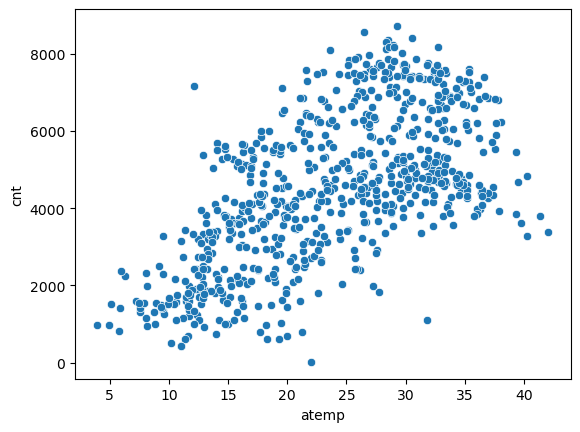

In [92]:
# atemp,cnt-----scatterplot
sns.scatterplot(x=df["atemp"],y=df["cnt"])
plt.show()

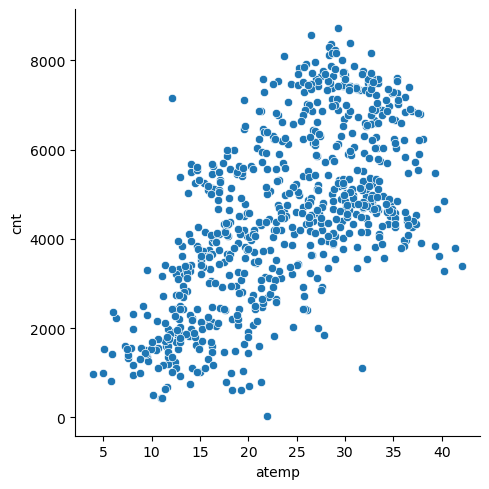

In [93]:
# atemp,cnt-----relplot
sns.relplot(x=df["atemp"],y=df["cnt"])
plt.show()

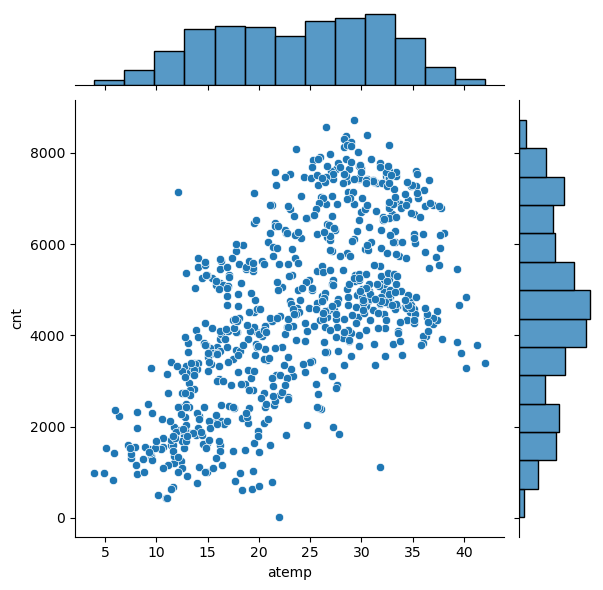

In [94]:
# atemp,cnt-----jointplot
sns.jointplot(x=df["atemp"],y=df["cnt"])
plt.show()

**hum-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

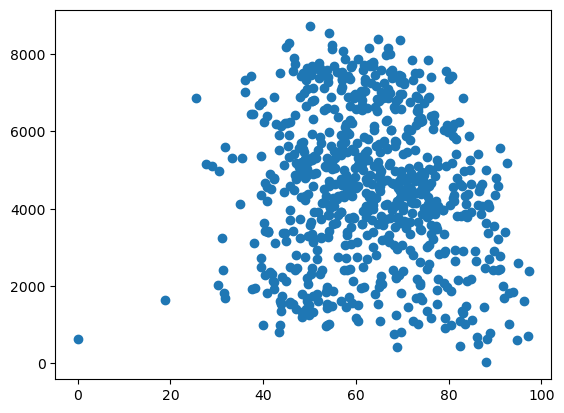

In [95]:
# hum,cnt-----scatterplot
plt.scatter(x=df["hum"],y=df["cnt"])
plt.show()

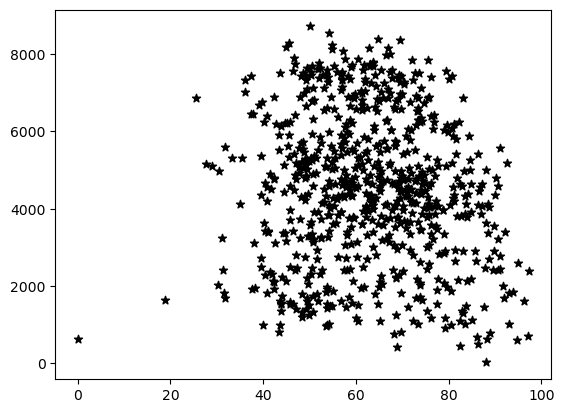

In [96]:
# hum,cnt-----scatterplot
plt.scatter(x=df["hum"],y=df["cnt"],marker="*",color="black")
plt.show()

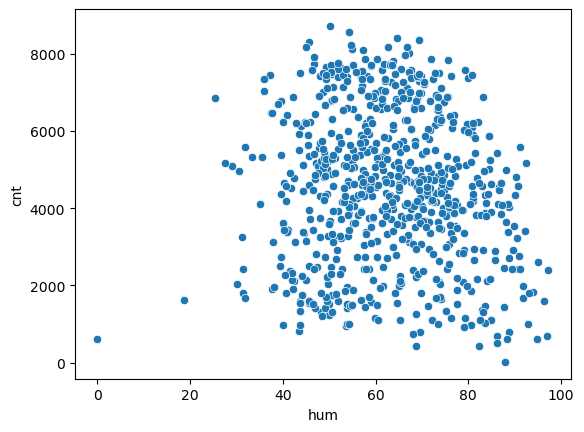

In [97]:
# hum,cnt-----scatterplot
sns.scatterplot(x=df["hum"],y=df["cnt"])
plt.show()

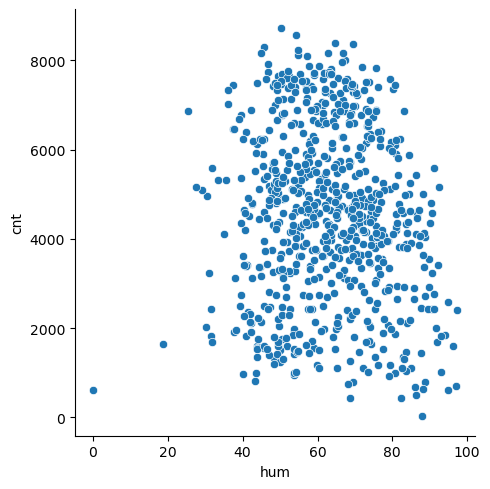

In [98]:
# hum,cnt-----relplot
sns.relplot(x=df["hum"],y=df["cnt"])
plt.show()

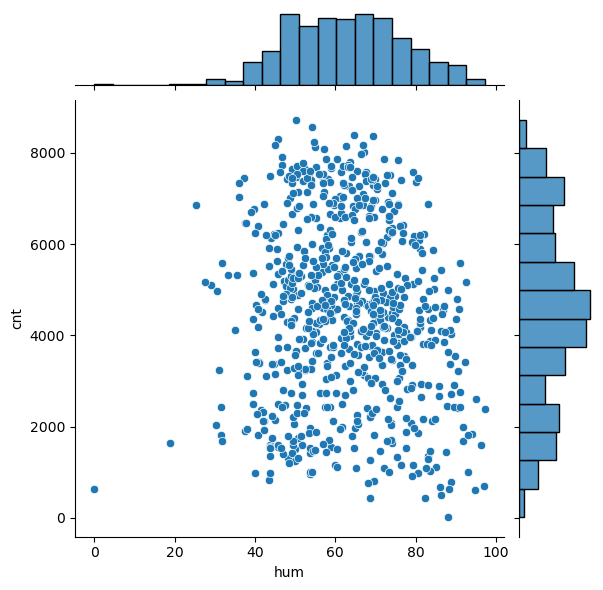

In [99]:
# hum,cnt-----jointplot
sns.jointplot(x=df["hum"],y=df["cnt"])
plt.show()

**windspeed-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

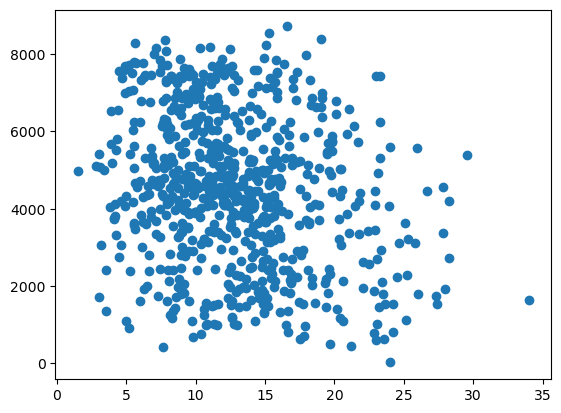

In [100]:
# windspeed,cnt-----scatterplot
plt.scatter(x=df["windspeed"],y=df["cnt"])
plt.show()

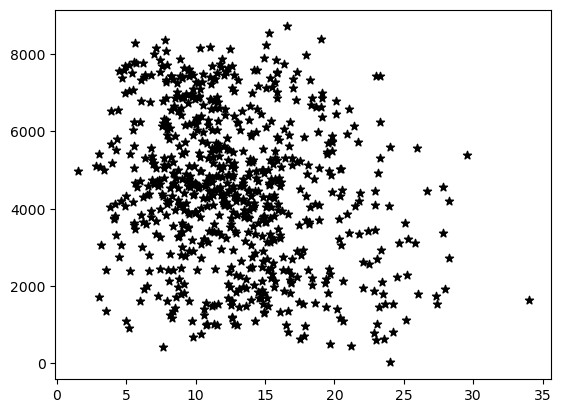

In [101]:
# windspeed,cnt-----scatterplot
plt.scatter(x=df["windspeed"],y=df["cnt"],marker="*",color="black")
plt.show()

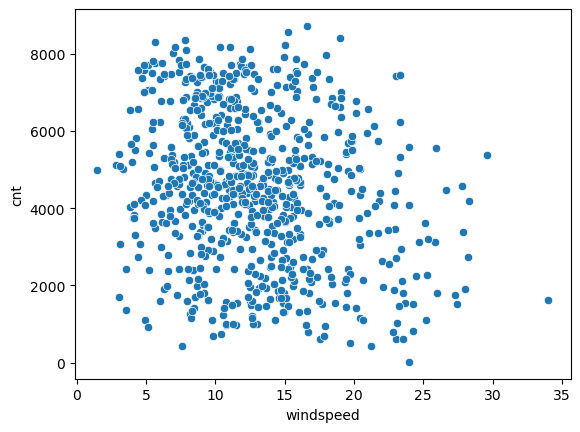

In [102]:
# windspeed,cnt-----scatterplot
sns.scatterplot(x=df["windspeed"],y=df["cnt"])
plt.show()

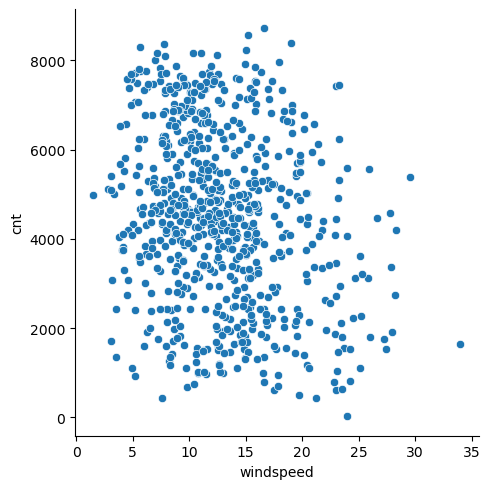

In [103]:
# windspeed,cnt-----relplot
sns.relplot(x=df["windspeed"],y=df["cnt"])
plt.show()

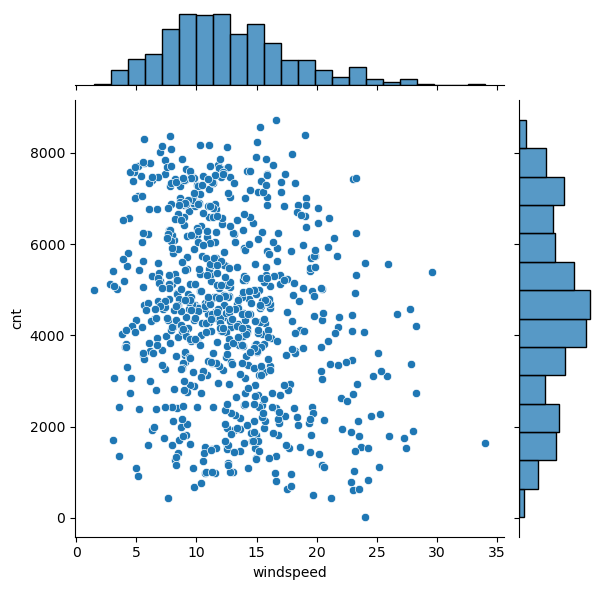

In [104]:
# windspeed,cnt-----jointplot
sns.jointplot(x=df["windspeed"],y=df["cnt"])
plt.show()

**casual-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

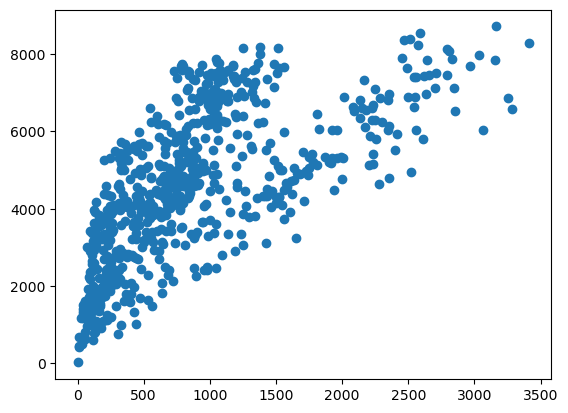

In [105]:
# casual,cnt-----scatterplot
plt.scatter(x=df["casual"],y=df["cnt"])
plt.show()

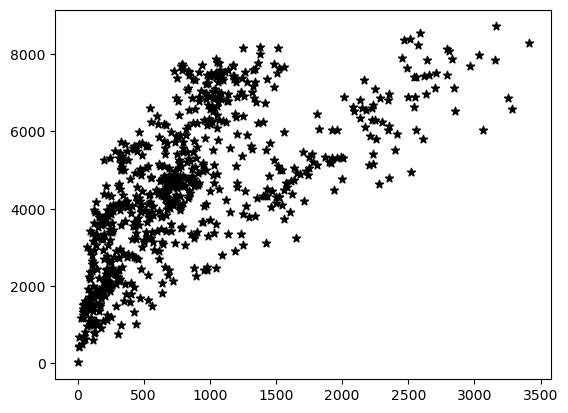

In [106]:
# casual,cnt-----scatterplot
plt.scatter(x=df["casual"],y=df["cnt"],marker="*",color="black")
plt.show()

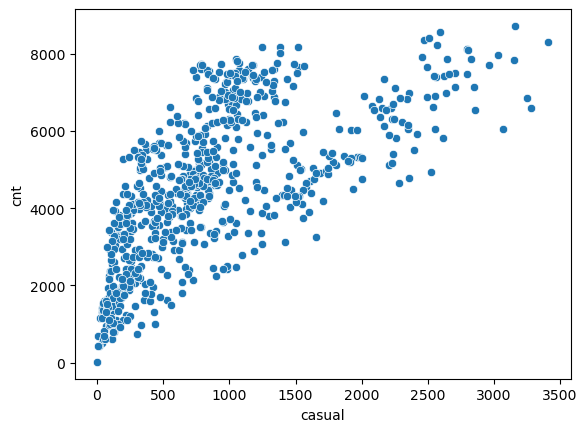

In [107]:
# casual,cnt-----scatterplot
sns.scatterplot(x=df["casual"],y=df["cnt"])
plt.show()

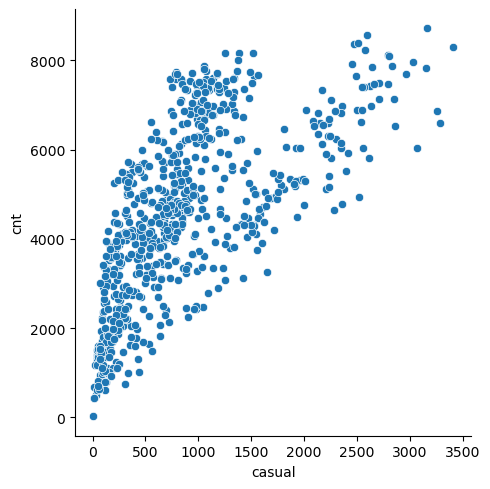

In [108]:
# casual,cnt-----relplot
sns.relplot(x=df["casual"],y=df["cnt"])
plt.show()

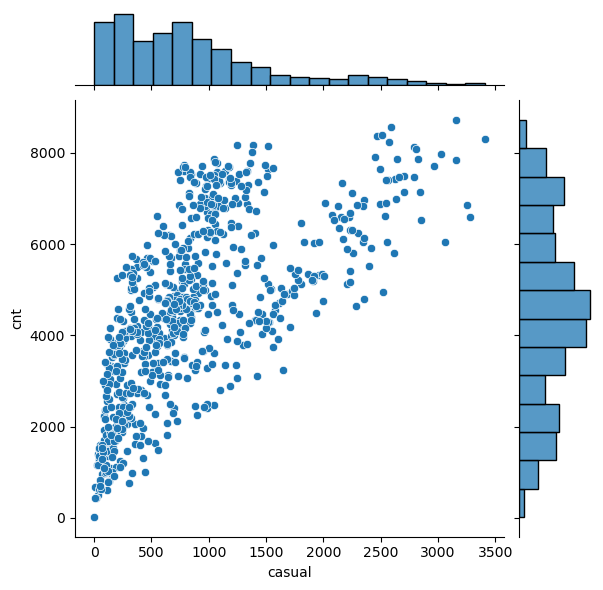

In [109]:
# casual,cnt-----jointplot
sns.jointplot(x=df["casual"],y=df["cnt"])
plt.show()

**registered-cnt**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

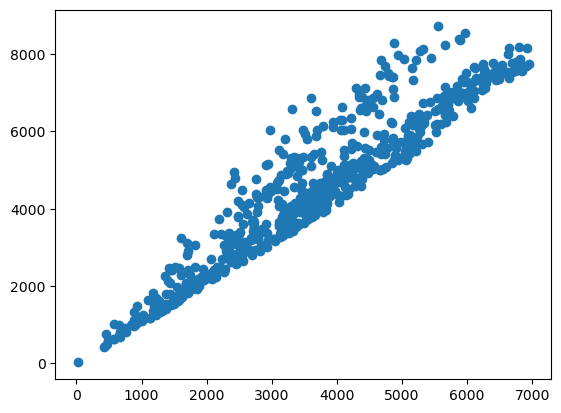

In [110]:
# registered,cnt-----scatterplot
plt.scatter(x=df["registered"],y=df["cnt"])
plt.show()

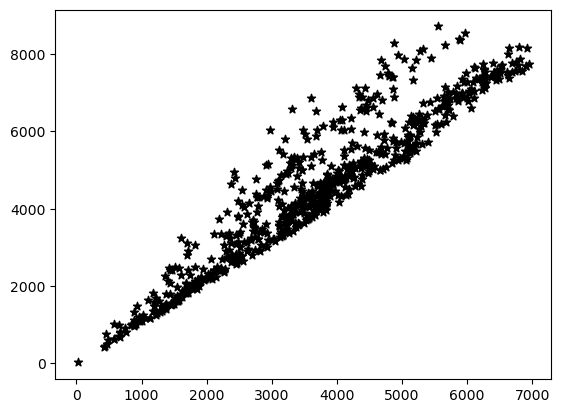

In [111]:
# registered,cnt-----scatterplot
plt.scatter(x=df["registered"],y=df["cnt"],marker="*",color="black")
plt.show()

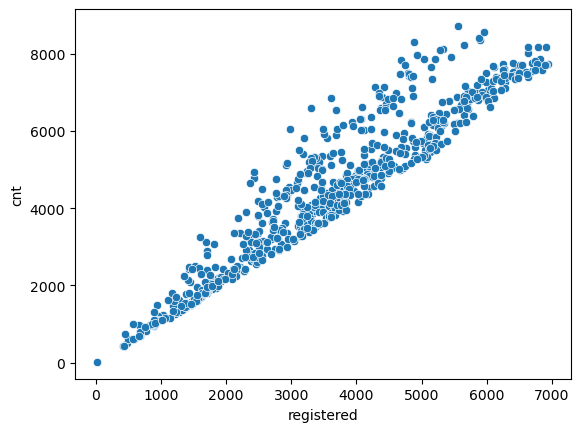

In [112]:
# registered,cnt-----scatterplot
sns.scatterplot(x=df["registered"],y=df["cnt"])
plt.show()

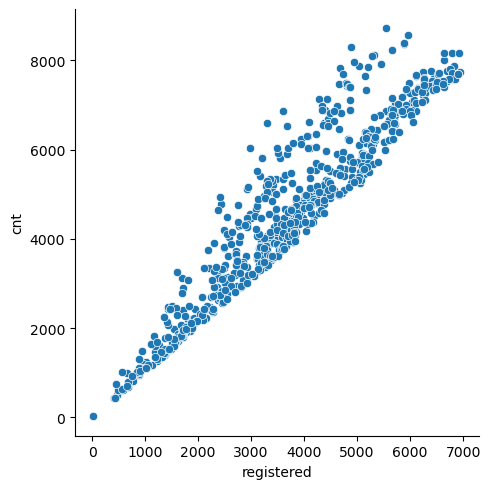

In [113]:
# registered,cnt-----relplot
sns.relplot(x=df["registered"],y=df["cnt"])
plt.show()

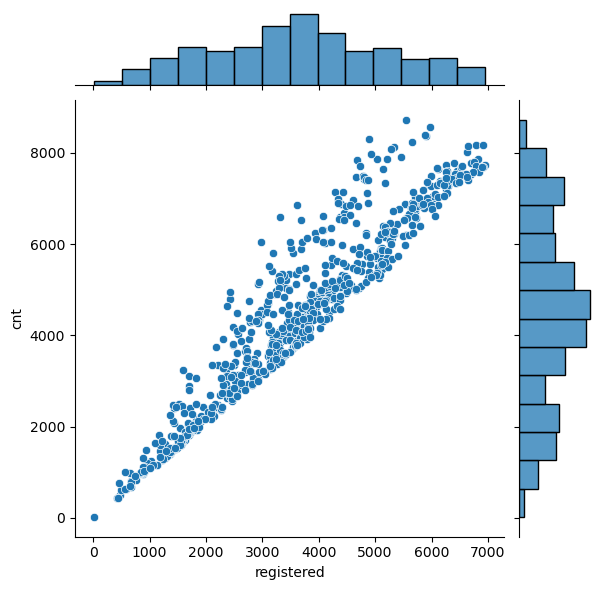

In [114]:
# registered,cnt-----jointplot
sns.jointplot(x=df["registered"],y=df["cnt"])
plt.show()

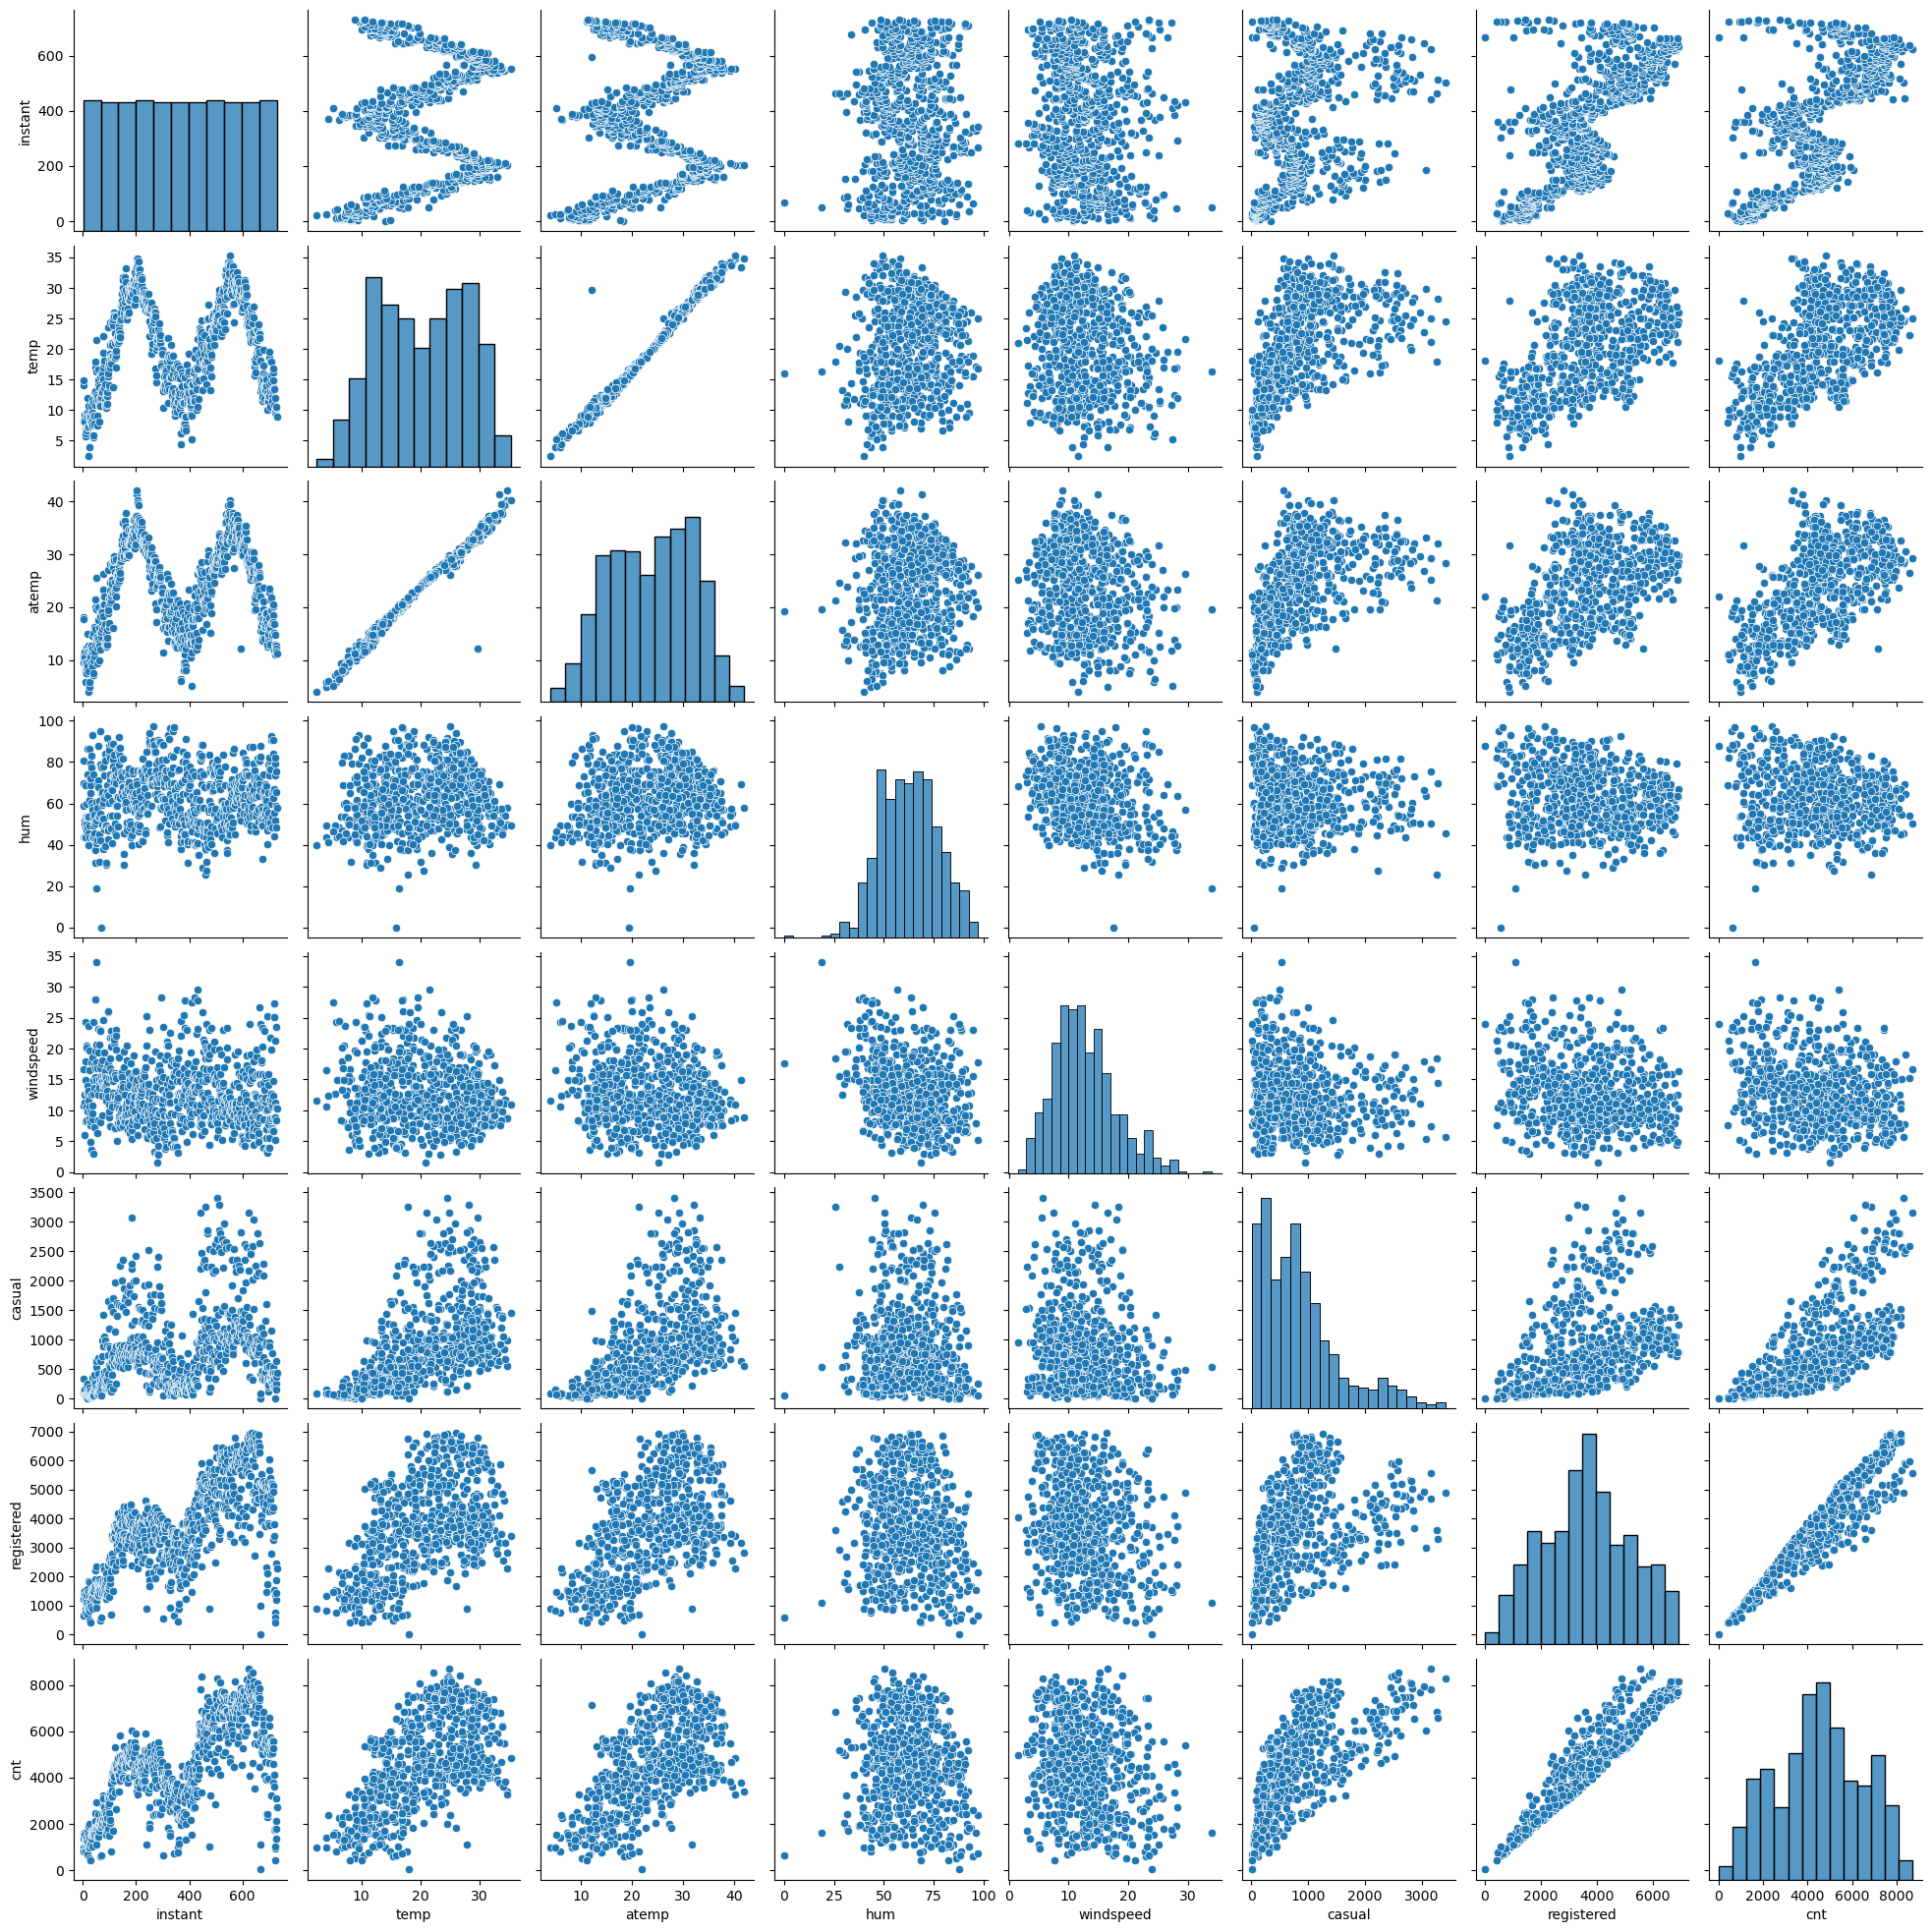

In [115]:
sns.pairplot(df[continuous])
plt.show()

**discrete_categorical**

**season**
- Pieplot
- Barplot
- countplot
- violinplot

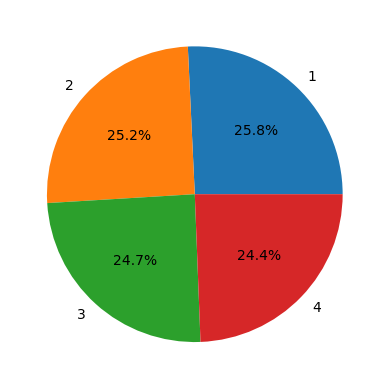

In [116]:
# season-----Pieplot
plt.pie(df["season"].value_counts(),labels=df["season"].unique(),autopct="%0.1f%%")
plt.show()

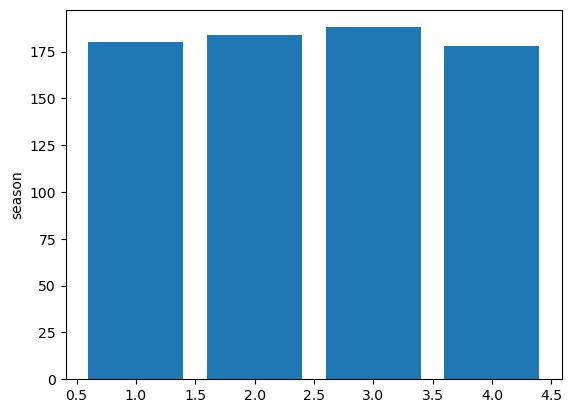

In [117]:
# season----Barplot
plt.bar(df["season"].value_counts().index,df["season"].value_counts())
plt.ylabel("season")
plt.show()

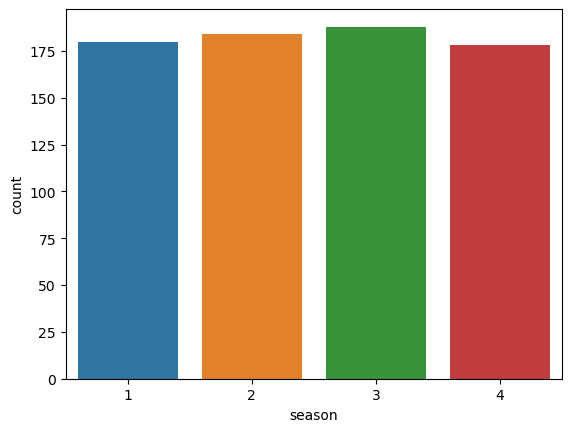

In [118]:
# countplot----season
sns.countplot(x=df["season"])
plt.show()

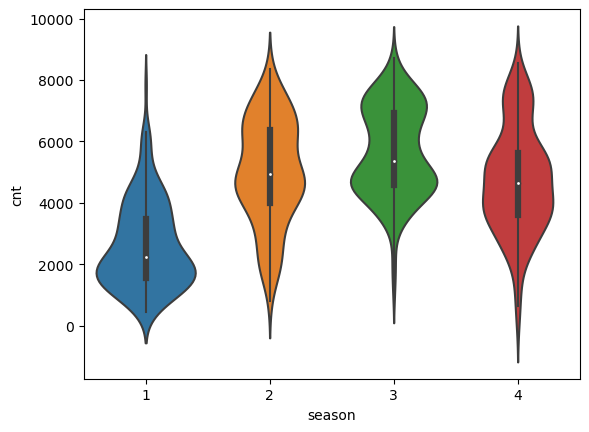

In [119]:
# season,cnt-----Violinplot
sns.violinplot(x=df["season"],y=df["cnt"])
plt.show()

**yr**
- Pieplot
- Barplot
- countplot
- violinplot

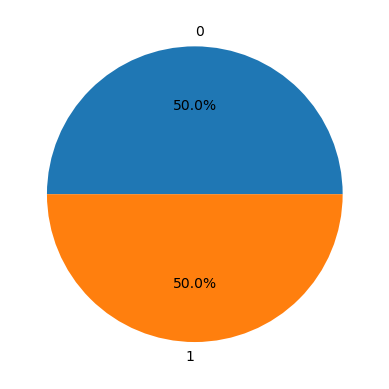

In [120]:
# yr-----Pieplot
plt.pie(df["yr"].value_counts(),labels=df["yr"].unique(),autopct="%0.1f%%")
plt.show()

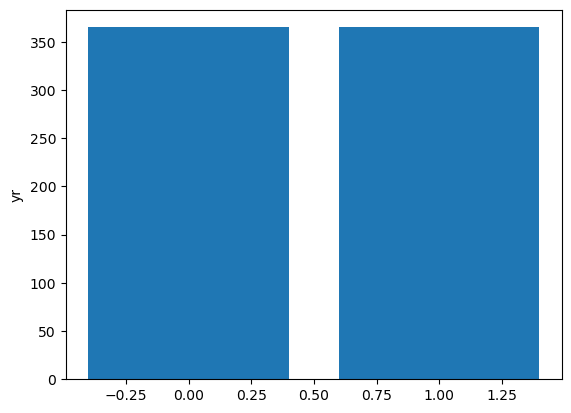

In [121]:
# yr----Barplot
plt.bar(df["yr"].value_counts().index,df["yr"].value_counts())
plt.ylabel("yr")
plt.show()

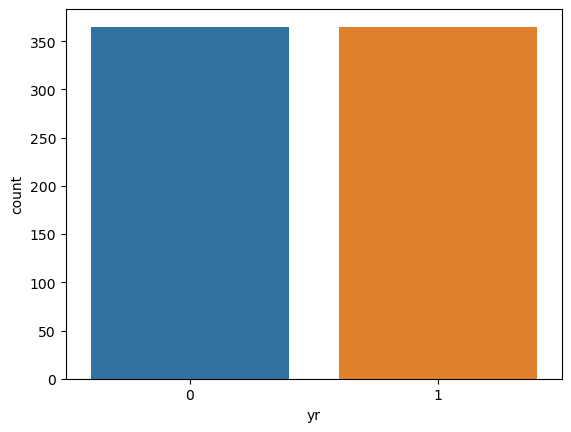

In [122]:
# countplot----yr
sns.countplot(x=df["yr"])
plt.show()

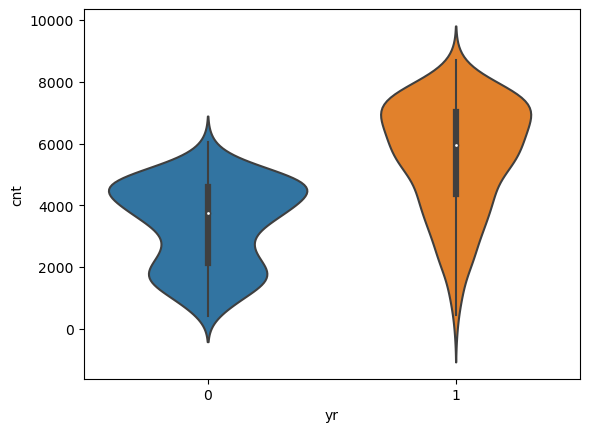

In [123]:
# yr,cnt-----Violinplot
sns.violinplot(x=df["yr"],y=df["cnt"])
plt.show()

**mnth**
- Pieplot
- Barplot
- countplot
- violinplot

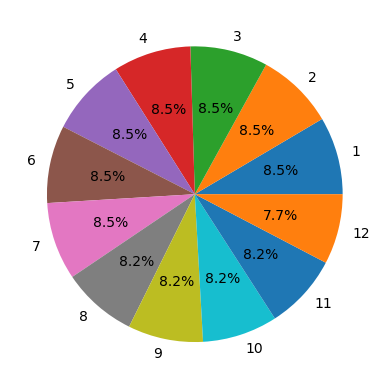

In [124]:
# mnth-----Pieplot
plt.pie(df["mnth"].value_counts(),labels=df["mnth"].unique(),autopct="%0.1f%%")
plt.show()

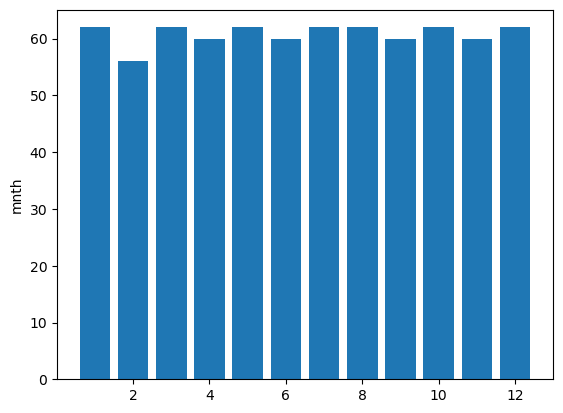

In [125]:
# mnth----Barplot
plt.bar(df["mnth"].value_counts().index,df["mnth"].value_counts())
plt.ylabel("mnth")
plt.show()

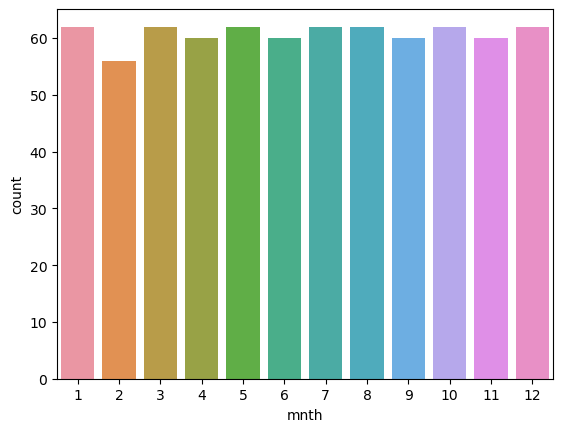

In [126]:
# countplot----mnth
sns.countplot(x=df["mnth"])
plt.show()

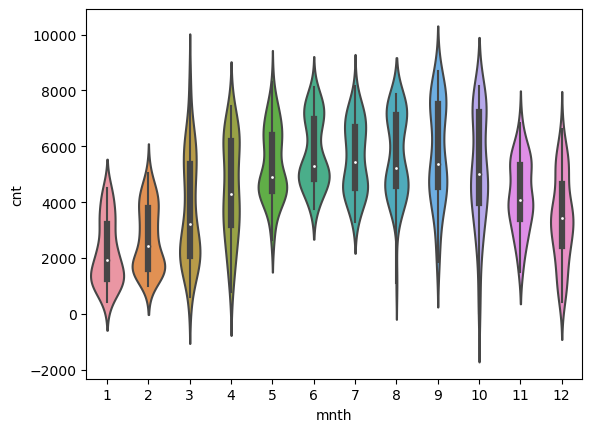

In [127]:
# mnth,cnt-----Violinplot
sns.violinplot(x=df["mnth"],y=df["cnt"])
plt.show()

**holiday**
- Pieplot
- Barplot
- countplot
- violinplot

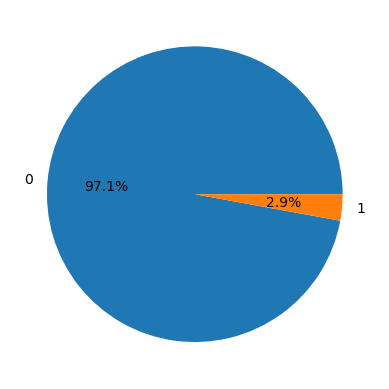

In [128]:
# holiday-----Pieplot
plt.pie(df["holiday"].value_counts(),labels=df["holiday"].unique(),autopct="%0.1f%%")
plt.show()

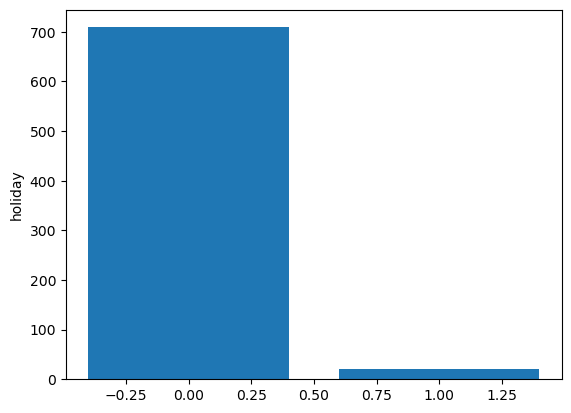

In [129]:
# holiday----Barplot
plt.bar(df["holiday"].value_counts().index,df["holiday"].value_counts())
plt.ylabel("holiday")
plt.show()

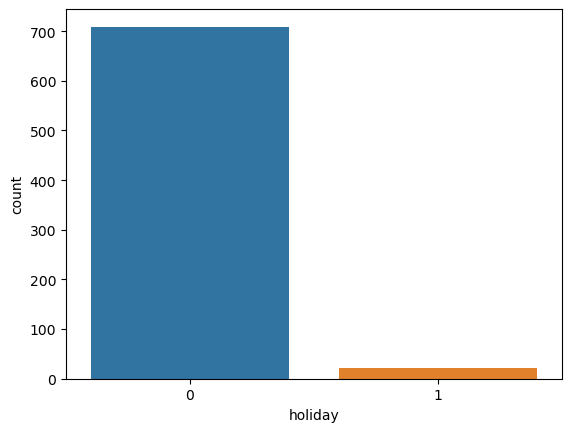

In [130]:
# countplot----holiday
sns.countplot(x=df["holiday"])
plt.show()

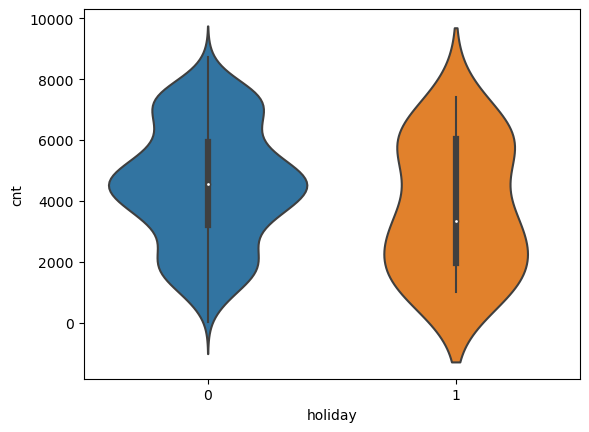

In [131]:
# holiday,cnt-----Violinplot
sns.violinplot(x=df["holiday"],y=df["cnt"])
plt.show()

**weekday**
- Pieplot
- Barplot
- countplot
- violinplot

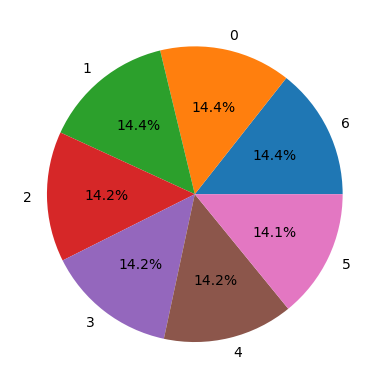

In [132]:
# weekday-----Pieplot
plt.pie(df["weekday"].value_counts(),labels=df["weekday"].unique(),autopct="%0.1f%%")
plt.show()

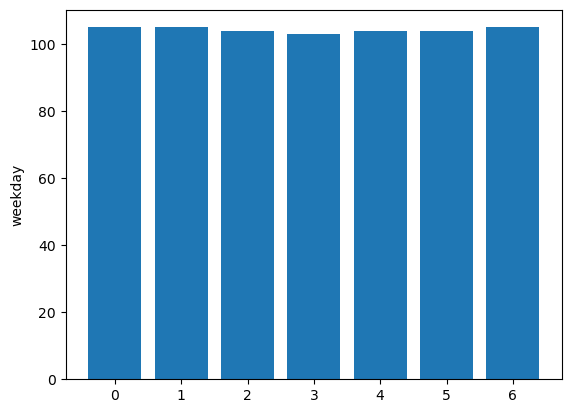

In [133]:
# weekday----Barplot
plt.bar(df["weekday"].value_counts().index,df["weekday"].value_counts())
plt.ylabel("weekday")
plt.show()

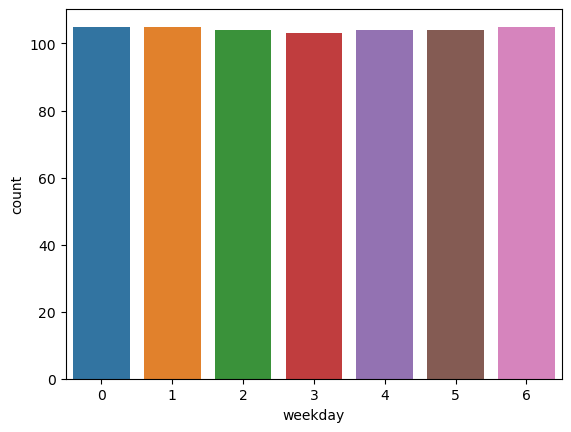

In [134]:
# countplot----weekday
sns.countplot(x=df["weekday"])
plt.show()

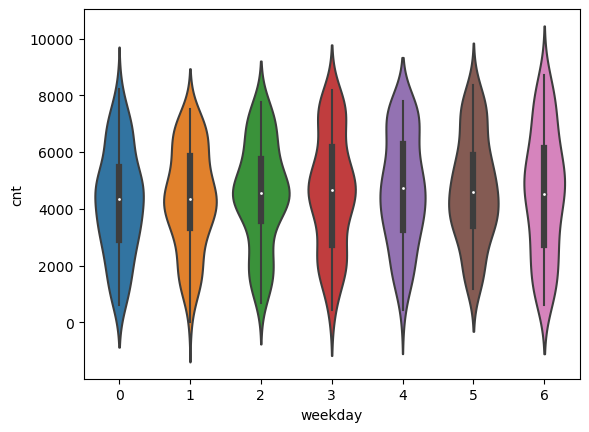

In [135]:
# weekday,cnt-----Violinplot
sns.violinplot(x=df["weekday"],y=df["cnt"])
plt.show()

**workingday**
- Pieplot
- Barplot
- countplot
- violinplot

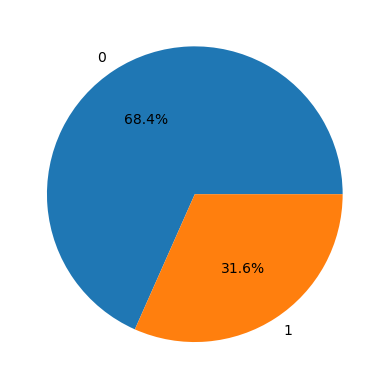

In [136]:
# workingday-----Pieplot
plt.pie(df["workingday"].value_counts(),labels=df["workingday"].unique(),autopct="%0.1f%%")
plt.show()

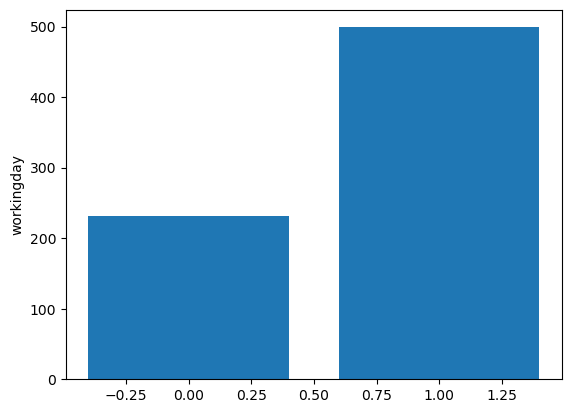

In [137]:
# workingday----Barplot
plt.bar(df["workingday"].value_counts().index,df["workingday"].value_counts())
plt.ylabel("workingday")
plt.show()

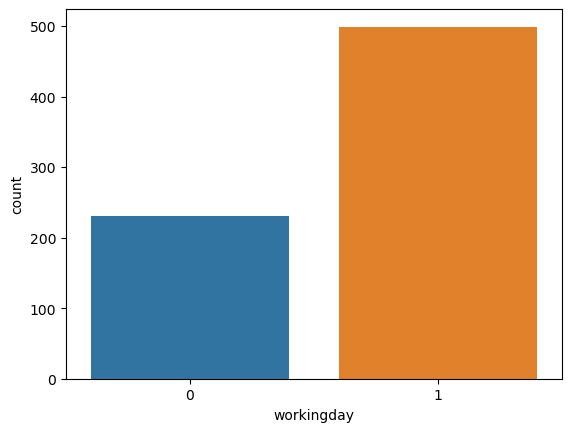

In [138]:
# countplot----workingday
sns.countplot(x=df["workingday"])
plt.show()

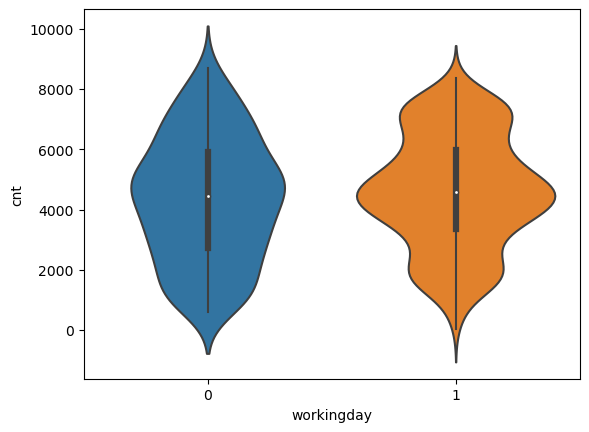

In [139]:
# workingday,cnt-----Violinplot
sns.violinplot(x=df["workingday"],y=df["cnt"])
plt.show()

**weathersit**
- Pieplot
- Barplot
- countplot
- violinplot

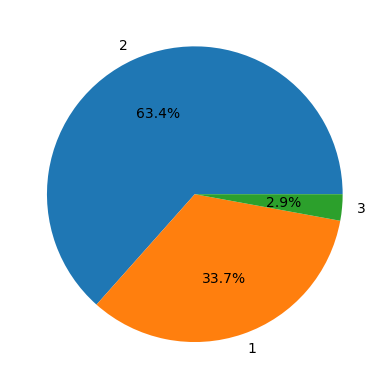

In [140]:
# weathersit-----Pieplot
plt.pie(df["weathersit"].value_counts(),labels=df["weathersit"].unique(),autopct="%0.1f%%")
plt.show()

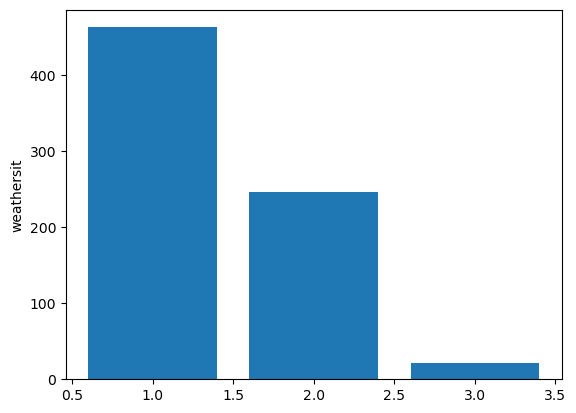

In [141]:
# weathersit----Barplot
plt.bar(df["weathersit"].value_counts().index,df["weathersit"].value_counts())
plt.ylabel("weathersit")
plt.show()

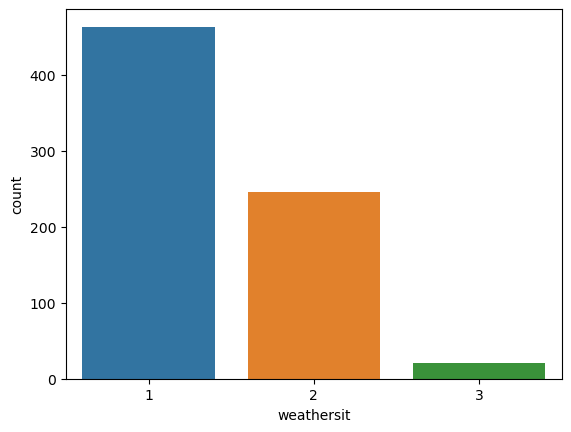

In [142]:
# countplot----weathersit
sns.countplot(x=df["weathersit"])
plt.show()

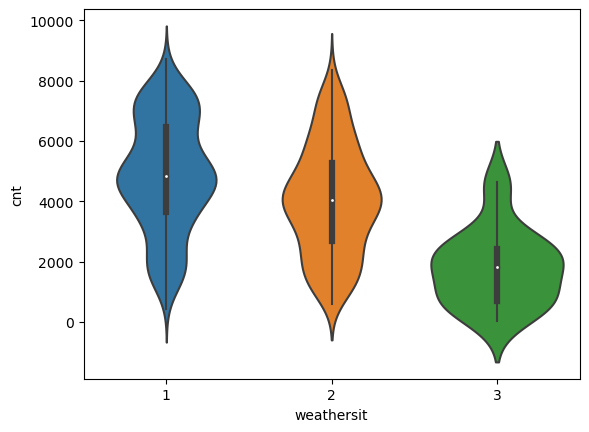

In [143]:
# weathersit,cnt-----Violinplot
sns.violinplot(x=df["weathersit"],y=df["cnt"])
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

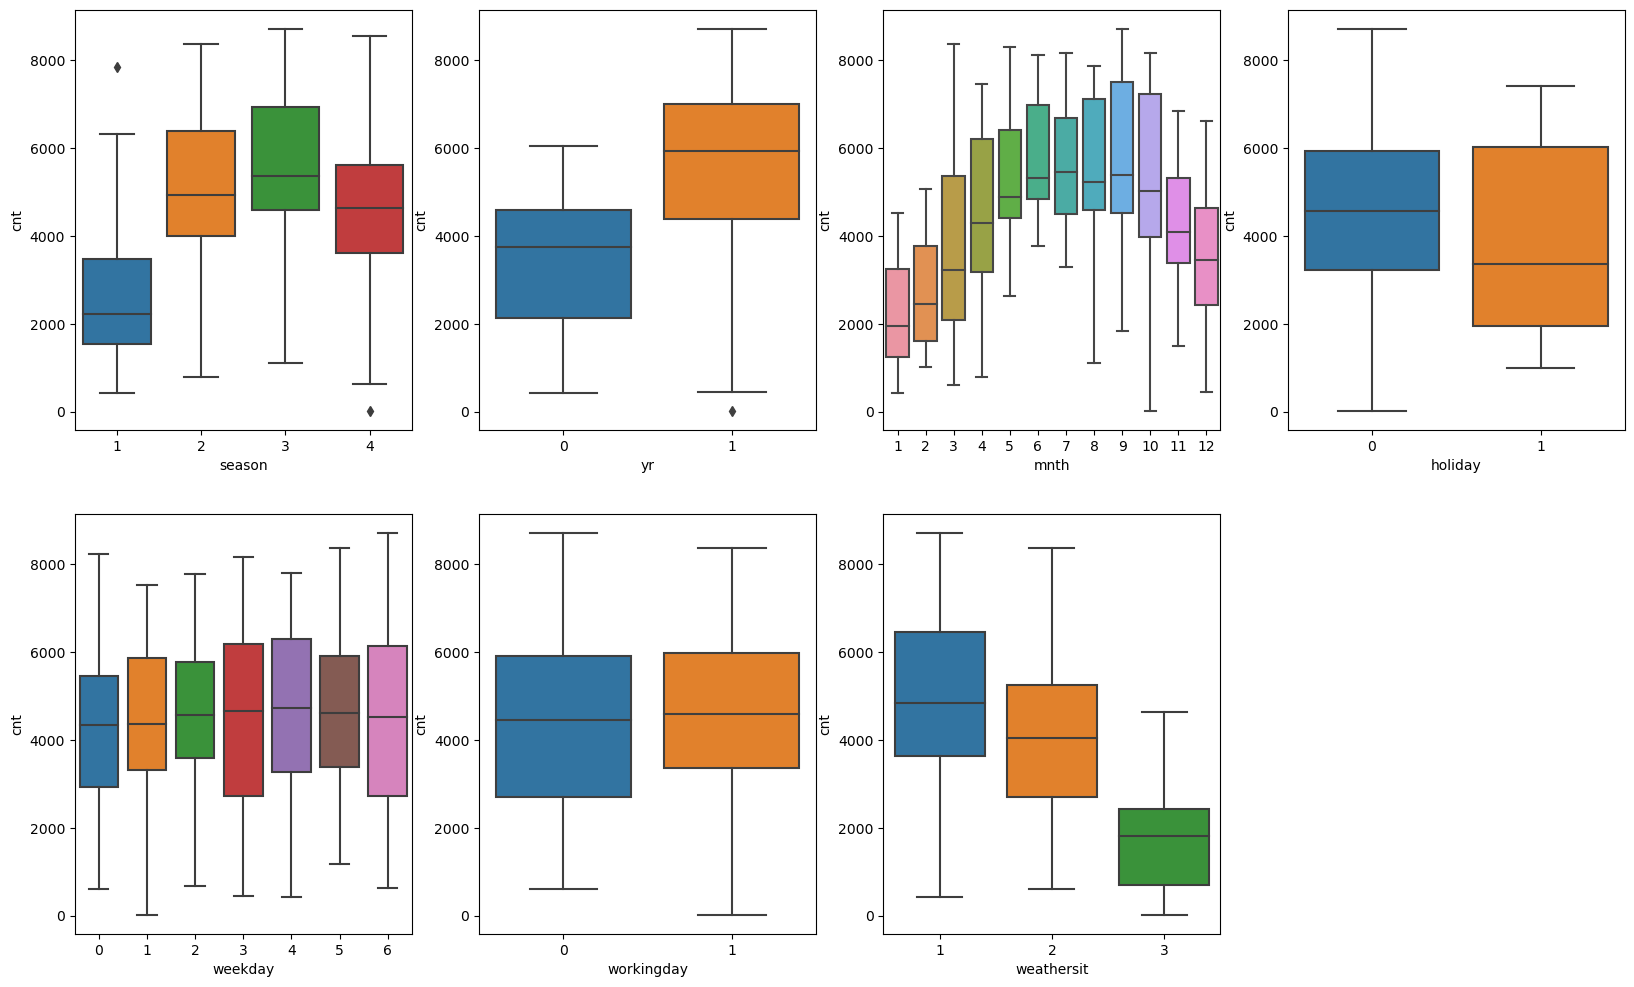

In [144]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x="season",y="cnt",data=df)

plt.subplot(2,4,2)
sns.boxplot(x="yr",y="cnt",data=df)

plt.subplot(2,4,3)
sns.boxplot(x="mnth",y="cnt",data=df)

plt.subplot(2,4,4)
sns.boxplot(x="holiday",y="cnt",data=df)

plt.subplot(2,4,5)
sns.boxplot(x="weekday",y="cnt",data=df)

plt.subplot(2,4,6)
sns.boxplot(x="workingday",y="cnt",data=df)

plt.subplot(2,4,7)
sns.boxplot(x="weathersit",y="cnt",data=df)

**Missing values**

In [145]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [146]:
df.isnull().sum()/len(df)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**Duplicates**

In [147]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [148]:
df.duplicated().sum()

0

# Step-3: Data Preprocessing
- Feature selection
- Feature Engineering
- Data cleaning
  - wrong data
  - missing values
  - wrong data type
  - duplicates
  - outliers
- Data Wrangling
  - Feature Transformation(applicable on continuous)
  - Feature scaling(applicable on continuous)
  - Encoding(applicable on discrete categorical)
- **Dont apply any Data Wrangling technique on count variable**

**Feature Selection**
- Feature selection is important here,because dropping of instant,dteday is mandatory

In [149]:
# Removing the serial no.
df.drop(columns=["instant","dteday"],axis=1,inplace=True)
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [150]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [151]:
continuous=["temp","atemp","hum","windspeed","casual","registered","cnt"]

**Heatmap**

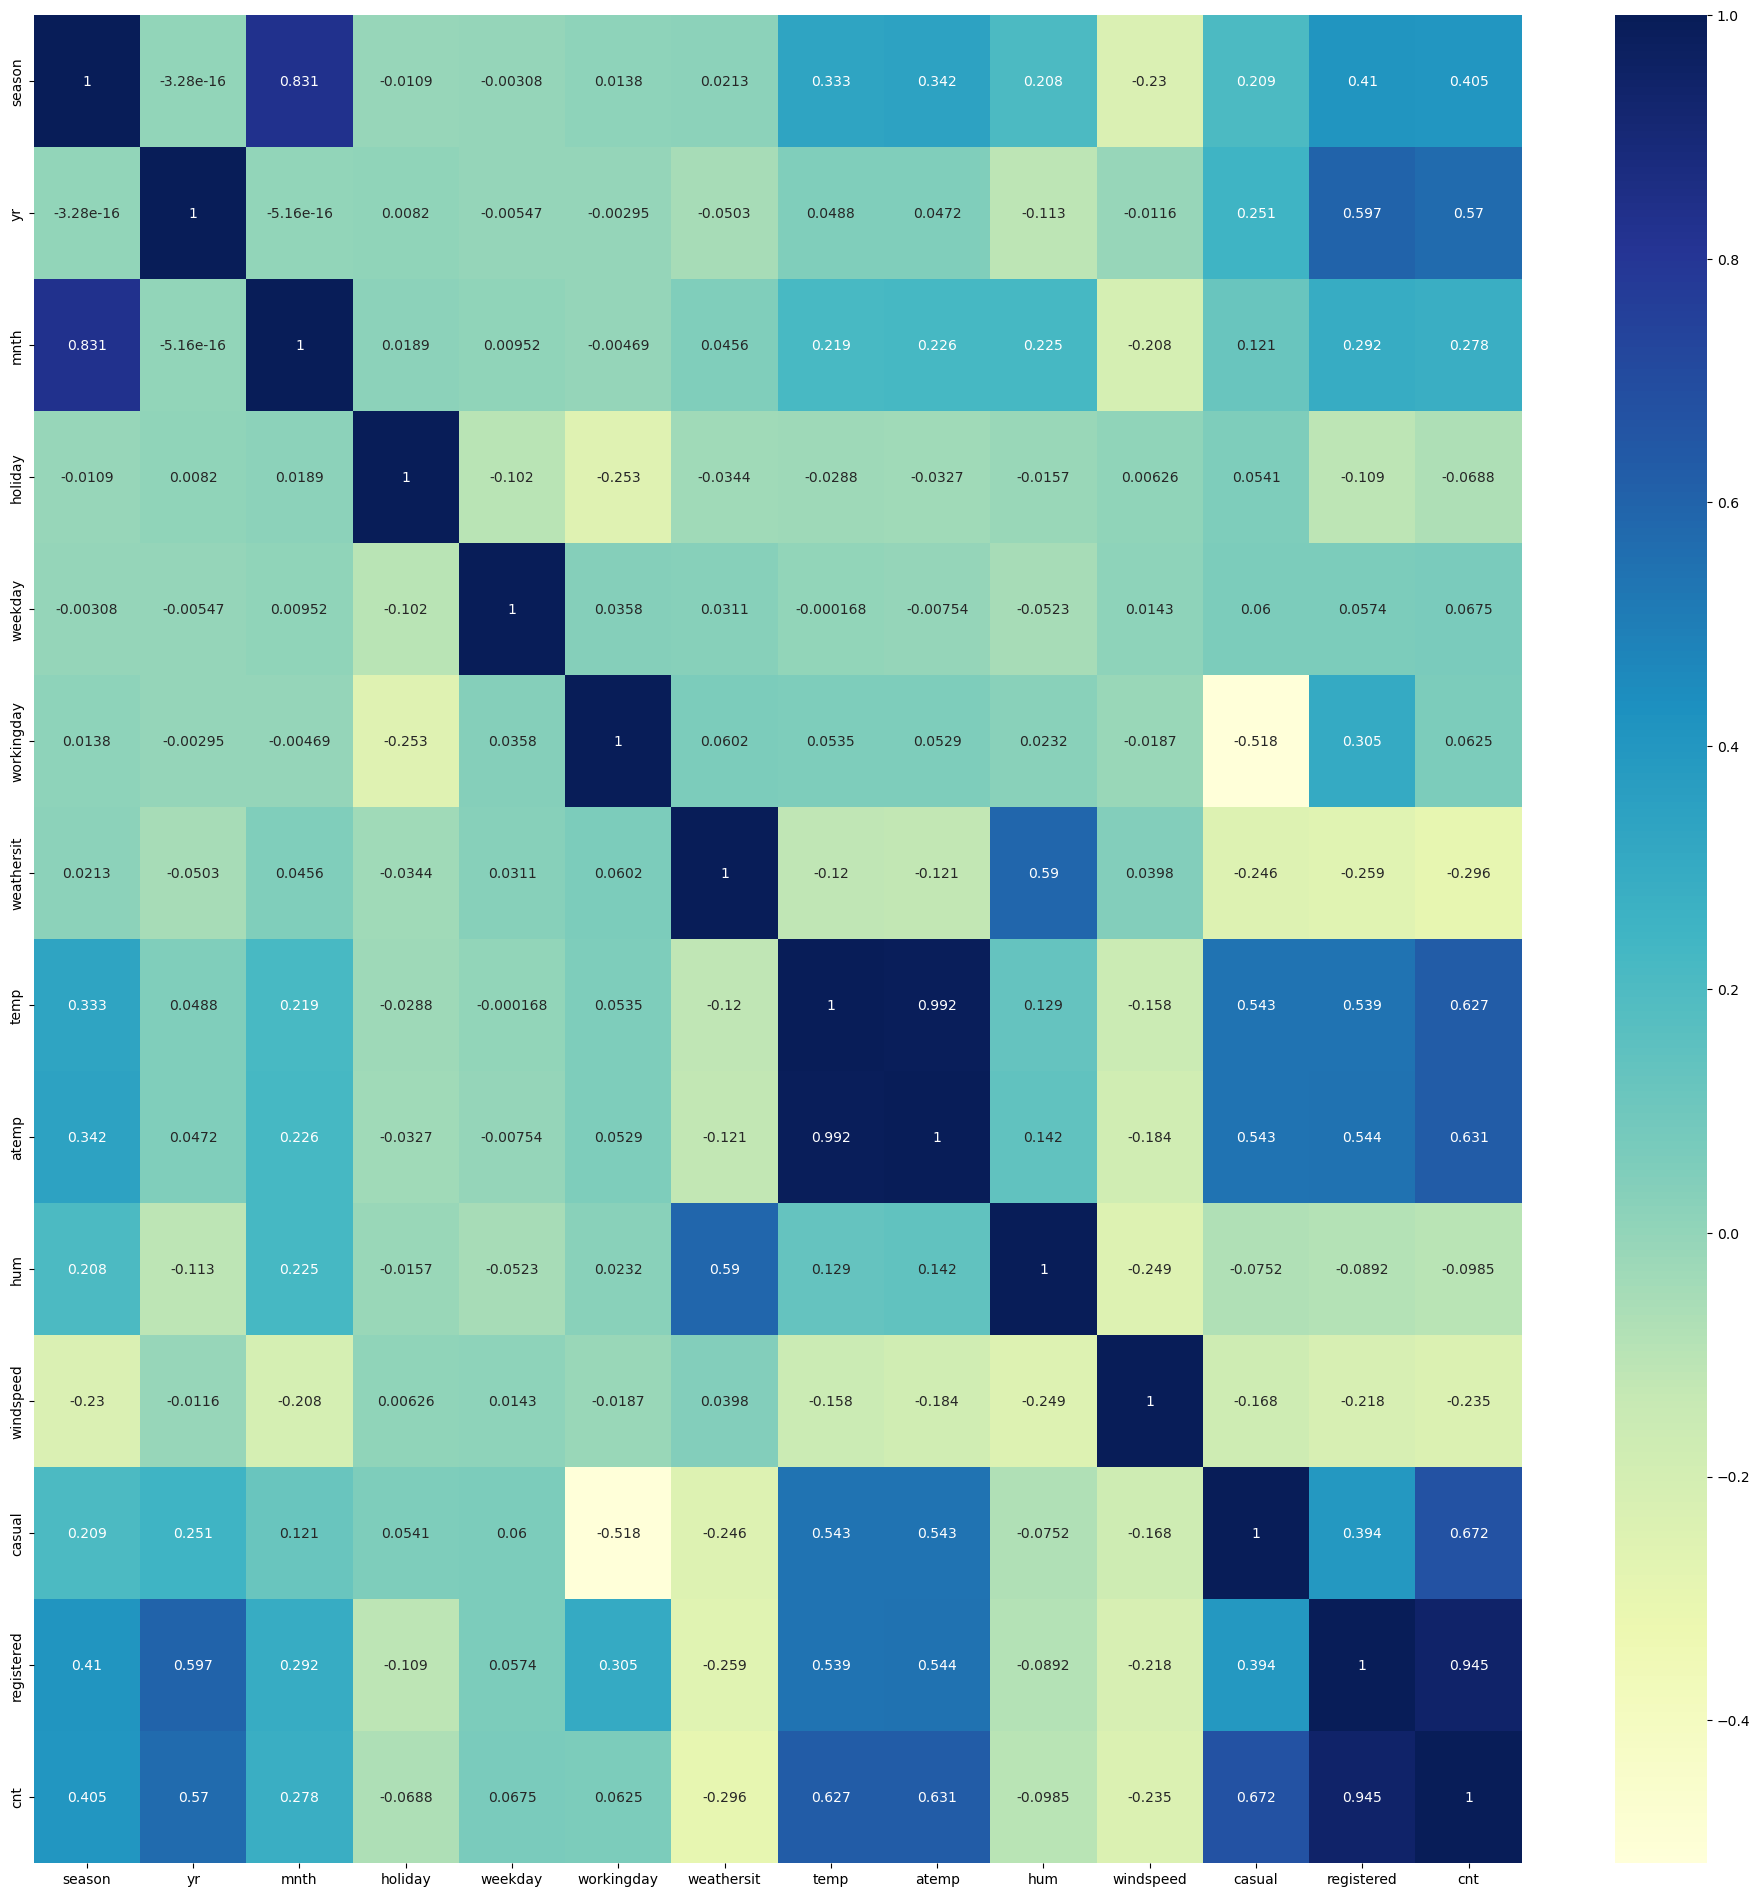

In [152]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,fmt="0.3g",cmap="YlGnBu")
plt.show()

**Data Cleaning**
- wrong data
- Missing values
- wrong Datatype
- Duplicates
- outliers

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


**Missing values**

In [154]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [155]:
df.isnull().sum()/len(df)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**Duplicates**

In [156]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [157]:
df.duplicated().sum()

0

**Outliers**
- hum
- windspeed
- casual

In [158]:
df["hum"].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

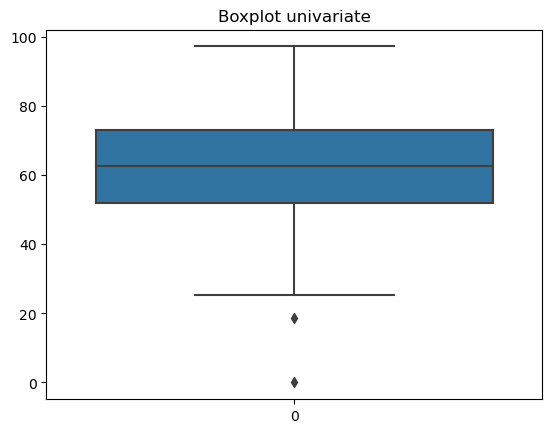

In [159]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["hum"])
plt.show()

In [160]:
#quantiles
Q1=df["hum"].quantile(0.25)
print("Q1:",Q1)
Q3=df["hum"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit:",upper_limit)

Q1: 52.0
Q3: 72.989575
IQR: 20.989575000000002
lower_limit: 20.515637499999997
upper_limit: 104.4739375


In [161]:
Houtliers_index=df[(df["hum"]<lower_limit)|(df["hum"]>upper_limit)]
Houtliers_index

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
49       1   0     2        0        6           0           1  16.365847   
68       1   0     3        0        4           1           3  15.952731   

      atemp      hum  windspeed  casual  registered   cnt  
49  19.5702  18.7917  34.000021     532        1103  1635  
68  19.2834   0.0000  17.545759      46         577   623

In [162]:
df["hum"]=df["hum"].clip(lower=20.515637499999997,upper=104.4739375)
df["hum"]

0      80.5833
1      69.6087
2      43.7273
3      59.0435
4      43.6957
        ...   
725    65.2917
726    59.0000
727    75.2917
728    48.3333
729    57.7500
Name: hum, Length: 730, dtype: float64

In [163]:
df[(df["hum"]<lower_limit)|(df["hum"]>upper_limit)]

Empty DataFrame
Columns: [season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [164]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

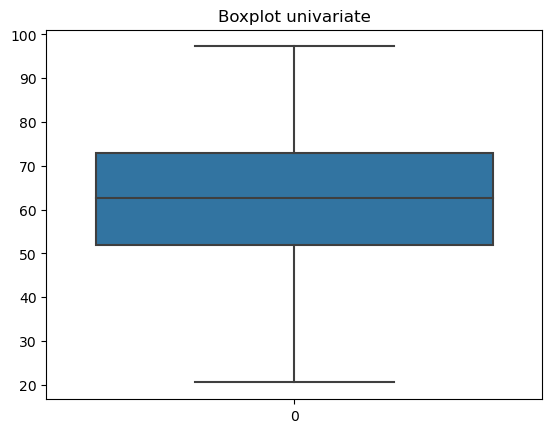

In [165]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["hum"])
plt.show()

In [166]:
df["windspeed"].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

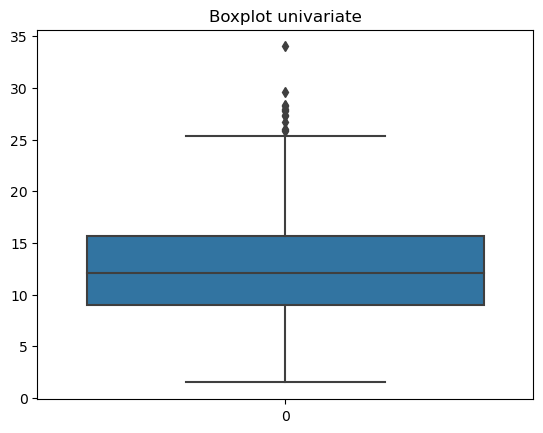

In [167]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["windspeed"])
plt.show()

In [168]:
#quantiles
Q1=df["windspeed"].quantile(0.25)
print("Q1:",Q1)
Q3=df["windspeed"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit:",upper_limit)

Q1: 9.04165
Q3: 15.62558925
IQR: 6.58393925
lower_limit: -0.8342588749999997
upper_limit: 25.501498125


In [169]:
Woutliers_index=df[(df["windspeed"]<lower_limit)|(df["windspeed"]>upper_limit)]
Woutliers_index

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
44        1   0     2        0        1           1           1  17.015000   
49        1   0     2        0        6           0           1  16.365847   
93        2   0     4        0        1           1           1  23.506653   
94        2   0     4        0        2           1           2  16.980847   
292       4   0    10        0        4           1           1  19.509153   
382       1   1     1        0        3           1           1  12.436653   
407       1   1     2        0        0           0           1   5.227500   
420       1   1     2        0        6           0           1  11.924153   
431       1   1     3        0        4           1           1  21.627500   
432       1   1     3        0        5           1           2  16.844153   
449       2   1     3        0        1           1           1  18.279153   
665       4   1    10        0        0           0           2  19.577500   
720       1   1    12        0        6           0           1  10.899153   

        atemp        hum  windspeed  casual  registered   cnt  
44   19.91750  37.583300  27.999836     208        1705  1913  
49   19.57020  20.515637  34.000021     532        1103  1635  
93   27.14645  42.625000  25.833257     734        2381  3115  
94   19.91750  64.208300  26.000489     167        1628  1795  
292  23.32625  63.625000  28.292425     471        3724  4195  
382  13.76270  44.333300  27.833743     109        3267  3376  
407   5.08290  46.458300  27.417204      73        1456  1529  
420  12.78375  39.583300  28.250014     317        2415  2732  
431  26.23020  56.750000  29.584721     486        4896  5382  
432  19.85415  40.708300  27.791600     447        4122  4569  
449  21.93750  47.791700  25.917007     795        4763  5558  
665  23.38855  69.458300  26.666536     998        3461  4459  
720  11.80565  44.125000  27.292182     205        1544  1749

In [170]:
df["windspeed"]=df["windspeed"].clip(lower=-0.8342588749999997,upper=25.501498125)
df["windspeed"]

0      10.749882
1      16.652113
2      16.636703
3      10.739832
4      12.522300
         ...    
725    23.458911
726    10.416557
727     8.333661
728    23.500518
729    10.374682
Name: windspeed, Length: 730, dtype: float64

In [171]:
df[(df["windspeed"]<lower_limit)|(df["windspeed"]>upper_limit)]

Empty DataFrame
Columns: [season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [172]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

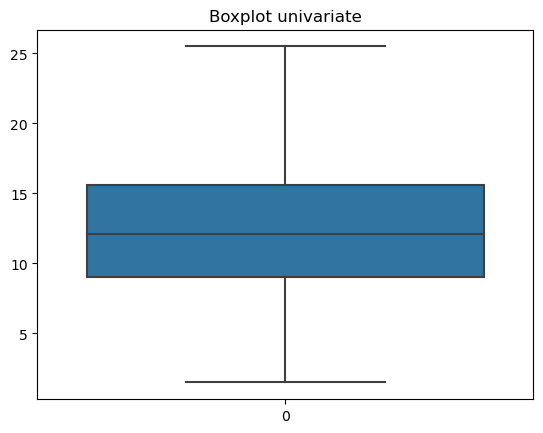

In [173]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["windspeed"])
plt.show()

In [174]:
df["casual"].describe()

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64

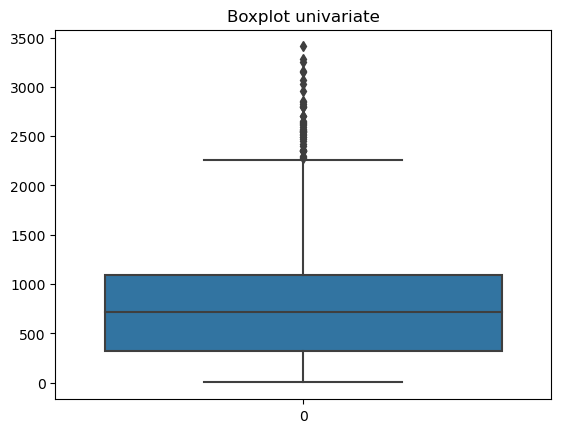

In [175]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["casual"])
plt.show()

In [176]:
#quantiles
Q1=df["casual"].quantile(0.25)
print("Q1:",Q1)
Q3=df["casual"].quantile(0.75)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)
lower_limit=Q1-1.5*IQR
print("lower_limit:",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit:",upper_limit)

Q1: 316.25
Q3: 1096.5
IQR: 780.25
lower_limit: -854.125
upper_limit: 2266.875


In [177]:
Coutliers_index=df[(df["casual"]<lower_limit)|(df["casual"]>upper_limit)]
Coutliers_index

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
148       2   0     5        0        0           0           1  27.367500   
183       3   0     7        0        0           0           2  29.383347   
184       3   0     7        1        1           0           2  29.793347   
196       3   0     7        0        6           0           1  28.153347   
246       3   0     9        0        0           0           1  29.075847   
281       4   0    10        0        0           0           1  22.174153   
440       1   1     3        0        6           0           2  21.080847   
446       2   1     3        0        5           1           2  24.668347   
454       2   1     3        0        6           0           2  17.390847   
455       2   1     4        0        0           0           2  17.459153   
461       2   1     4        0        6           0           1  17.937500   
468       2   1     4        0        6           0           1  20.295000   
469       2   1     4        0        0           0           1  24.873347   
475       2   1     4        0        6           0           1  23.370000   
489       2   1     5        0        6           0           2  25.488347   
496       2   1     5        0        6           0           1  23.130847   
503       2   1     5        0        6           0           1  24.600000   
504       2   1     5        0        0           0           1  25.454153   
510       2   1     5        0        6           0           1  28.392500   
511       2   1     5        0        0           0           1  28.290000   
512       2   1     5        1        1           0           1  29.212500   
517       2   1     6        0        6           0           1  23.916653   
518       2   1     6        0        0           0           1  24.702500   
524       2   1     6        0        6           0           1  29.144153   
531       2   1     6        0        6           0           1  25.898347   
532       2   1     6        0        0           0           1  24.292500   
538       3   1     6        0        6           0           1  29.998347   
539       3   1     6        0        0           0           1  30.476653   
549       3   1     7        1        3           0           1  32.355847   
559       3   1     7        0        6           0           2  28.836653   
567       3   1     7        0        0           0           2  27.367500   
580       3   1     8        0        6           0           1  32.526653   
594       3   1     8        0        6           0           1  27.811653   
608       3   1     9        0        6           0           2  30.886653   
609       3   1     9        0        0           0           2  28.563347   
616       3   1     9        0        0           0           1  25.010000   
622       3   1     9        0        6           0           1  24.941653   
629       3   1     9        0        6           0           1  26.650000   
630       4   1     9        0        0           0           1  21.695847   
636       4   1     9        0        6           0           1  22.242500   
643       4   1    10        0        6           0           1  22.720847   
657       4   1    10        0        6           0           1  19.850847   
664       4   1    10        0        6           0           2  21.730000   
679       4   1    11        0        0           0           1  17.254153   

        atemp      hum  windspeed  casual  registered   cnt  
148  30.77750  81.8750  14.333846    2355        2433  4788  
183  33.42875  68.2500  15.333486    2282        2367  4649  
184  33.27085  63.7917   5.459106    3065        2978  6043  
196  31.91315  58.5000  13.958914    2418        3505  5923  
246  33.27145  74.2083  13.833289    2521        2419  4940  
281  26.19915  72.7500   4.251150    2397        3114  5511  
440  25.25230  75.5833   7.417168    3155        4681  7836 

In [178]:
df["casual"]=df["casual"].clip(lower=-854.125,upper=2266.875)
df["casual"]

0      331.0
1      131.0
2      120.0
3      108.0
4       82.0
       ...  
725    247.0
726    644.0
727    159.0
728    364.0
729    439.0
Name: casual, Length: 730, dtype: float64

In [179]:
df[(df["casual"]<lower_limit)|(df["casual"]>upper_limit)]

Empty DataFrame
Columns: [season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [180]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

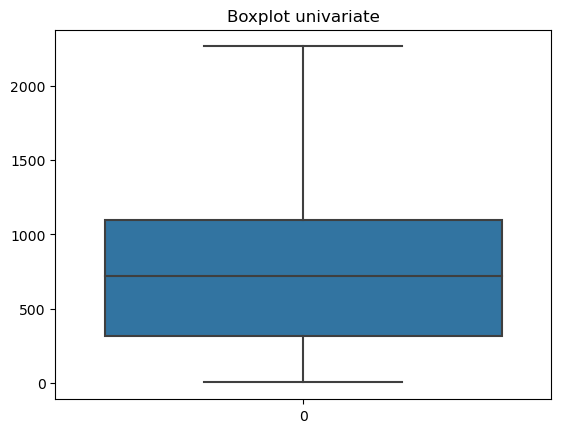

In [181]:
# BOXPLOT
plt.title("Boxplot univariate")

sns.boxplot(df["casual"])
plt.show()

In [182]:
df

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  
0    18.18125  80.5833  10.749882   331.0         654   985  
1    17.68695  69.6087  16.652113   131.0         670   801  
2     9.47025  43.7273  16.636703   120.0        1229  1349  
3    10.60610  59.0435  10.739832   108.0        1454  1562  
4    11.46350  43.6957  12.522300    82.0        1518  1600  
..        ...      ...        ...     ...         ...   ...  
725  11.33210  65.2917  23.458911   247.0        1867  2114  
726  12.75230  59.0000  10.416557   644.0        2451  3095  
727  12.12000  75.2917   8.333661   159.0        1182  1341  
728  11.58500  48.3333  23.500518   364.0        1432  1796  
729  11.17435  57.7500  10.374682   439.0        2290  2729  

[730 rows x 14 columns]

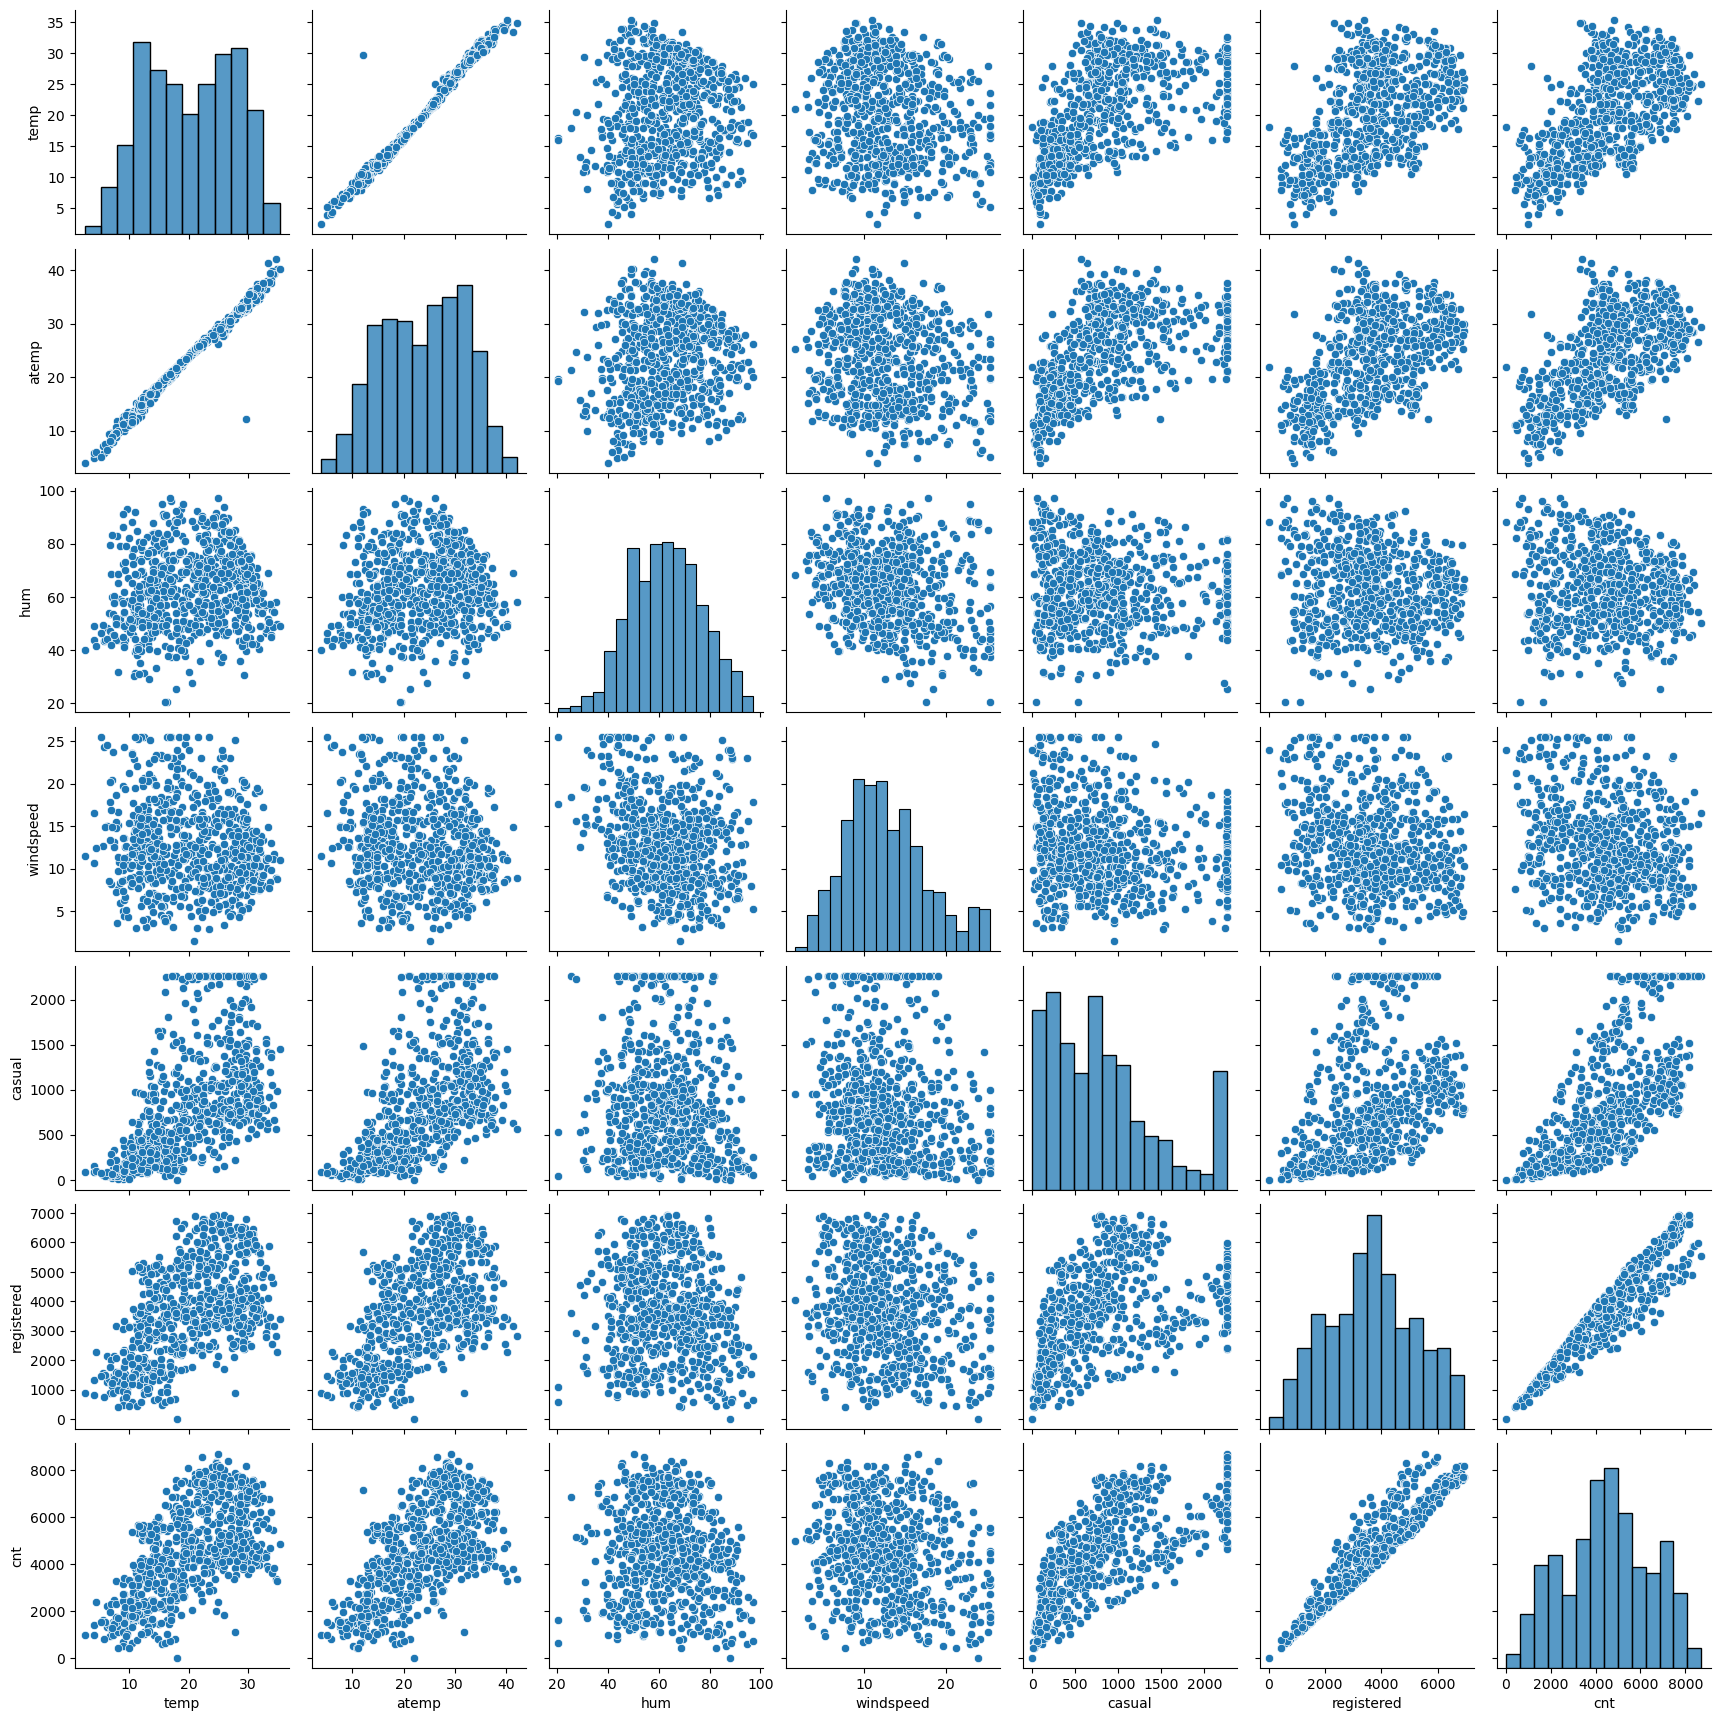

In [183]:
sns.pairplot(df[continuous])
plt.show()

**Heatmap**

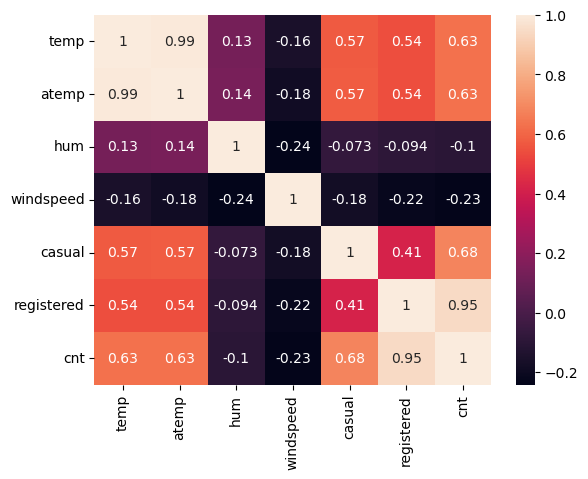

In [184]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

**Skewness**

In [185]:
df[continuous].describe()

temp       atemp         hum   windspeed       casual  \
count  730.000000  730.000000  730.000000  730.000000   730.000000   
mean    20.319259   23.726322   62.795640   12.720661   825.436301   
std      7.506729    8.150308   14.126173    5.071566   623.453022   
min      2.424346    3.953480   20.515637    1.500244     2.000000   
25%     13.811885   16.889713   52.000000    9.041650   316.250000   
50%     20.465826   24.368225   62.625000   12.125325   717.000000   
75%     26.880615   30.445775   72.989575   15.625589  1096.500000   
max     35.328347   42.044800   97.250000   25.501498  2266.875000   

        registered          cnt  
count   730.000000   730.000000  
mean   3658.757534  4508.006849  
std    1559.758728  1936.011647  
min      20.000000    22.000000  
25%    2502.250000  3169.750000  
50%    3664.500000  4548.500000  
75%    4783.250000  5966.000000  
max    6946.000000  8714.000000

In [186]:
df[continuous].skew()

temp         -0.057187
atemp        -0.133709
hum           0.012973
windspeed     0.531206
casual        0.912596
registered    0.041211
cnt          -0.049581
dtype: float64

In [187]:
df

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed  casual  registered   cnt  
0    18.18125  80.5833  10.749882   331.0         654   985  
1    17.68695  69.6087  16.652113   131.0         670   801  
2     9.47025  43.7273  16.636703   120.0        1229  1349  
3    10.60610  59.0435  10.739832   108.0        1454  1562  
4    11.46350  43.6957  12.522300    82.0        1518  1600  
..        ...      ...        ...     ...         ...   ...  
725  11.33210  65.2917  23.458911   247.0        1867  2114  
726  12.75230  59.0000  10.416557   644.0        2451  3095  
727  12.12000  75.2917   8.333661   159.0        1182  1341  
728  11.58500  48.3333  23.500518   364.0        1432  1796  
729  11.17435  57.7500  10.374682   439.0        2290  2729  

[730 rows x 14 columns]

In [188]:
df.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.795640   12.720661   
std      0.544807    7.506729    8.150308   14.126173    5.071566   
min      1.000000    2.424346    3.953480   20.515637    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   25.501498   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    825.436301  3658.757534  4508.006849  
std     623.453022  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    2266.875000  6946.000000  8714.000000

df["temp"]=df["temp"]**(2)
df["temp"].skew()

df["atemp"]=df["atemp"]**(2)
df["atemp"].skew()

df["windspeed"]=df["windspeed"]**(1/2)
df["windspeed"].skew()

df["casual"]=df["casual"]**(1/2)
df["casual"].skew()

df["cnt"]=df["cnt"]**(2)
df["cnt"].skew()

In [189]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [190]:
df[continuous].skew()

temp         -0.057187
atemp        -0.133709
hum           0.012973
windspeed     0.531206
casual        0.912596
registered    0.041211
cnt          -0.049581
dtype: float64

In [191]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [192]:
df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882   331.0         654   985  
1  17.68695  69.6087  16.652113   131.0         670   801  
2   9.47025  43.7273  16.636703   120.0        1229  1349  
3  10.60610  59.0435  10.739832   108.0        1454  1562  
4  11.46350  43.6957  12.522300    82.0        1518  1600

**Encoding**

In [193]:
df["season"]=df["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [194]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [195]:
df["season"].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [196]:
df["mnth"]=df["mnth"].map({1:"month_1",2:"month_2",3:"month_3",4:"month_4",5:"month_5",6:"month_6",7:"month_7",8:"month_8",9:"month_9",10:"month_10",11:"month_11",12:"month_12"})

In [197]:
df["mnth"].unique()

array(['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'], dtype=object)

In [198]:
df["mnth"].value_counts()

mnth
month_1     62
month_3     62
month_5     62
month_7     62
month_8     62
month_10    62
month_12    62
month_4     60
month_6     60
month_9     60
month_11    60
month_2     56
Name: count, dtype: int64

In [199]:
df["weathersit"]=df["weathersit"].map({1:"weathersit_1",2:"weathersit_2",3:"weathersit_3"})

In [200]:
df["weathersit"].unique()

array(['weathersit_2', 'weathersit_1', 'weathersit_3'], dtype=object)

In [201]:
df["weathersit"].value_counts()

weathersit
weathersit_1    463
weathersit_2    246
weathersit_3     21
Name: count, dtype: int64

In [202]:
df["weekday"]=df["weekday"].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

In [203]:
df["weekday"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [204]:
df["weekday"].value_counts()

weekday
Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: count, dtype: int64

In [205]:
df.head()

season  yr     mnth  holiday    weekday  workingday    weathersit  \
0  spring   0  month_1        0     Sunday           0  weathersit_2   
1  spring   0  month_1        0     Monday           0  weathersit_2   
2  spring   0  month_1        0    Tuesday           1  weathersit_1   
3  spring   0  month_1        0  Wednesday           1  weathersit_1   
4  spring   0  month_1        0   Thursday           1  weathersit_1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882   331.0         654   985  
1  14.902598  17.68695  69.6087  16.652113   131.0         670   801  
2   8.050924   9.47025  43.7273  16.636703   120.0        1229  1349  
3   8.200000  10.60610  59.0435  10.739832   108.0        1454  1562  
4   9.305237  11.46350  43.6957  12.522300    82.0        1518  1600

In [206]:
season_dummy_var=pd.get_dummies(df["season"],drop_first=True)

In [207]:
season_dummy_var.head()

spring  summer  winter
0    True   False   False
1    True   False   False
2    True   False   False
3    True   False   False
4    True   False   False

In [208]:
weathersit_dummy_var=pd.get_dummies(df["weathersit"],drop_first=True)

In [209]:
weathersit_dummy_var.head()

weathersit_2  weathersit_3
0          True         False
1          True         False
2         False         False
3         False         False
4         False         False

In [210]:
month_dummy_var=pd.get_dummies(df["mnth"],drop_first=True)

In [211]:
month_dummy_var.head()

month_10  month_11  month_12  month_2  month_3  month_4  month_5  month_6  \
0     False     False     False    False    False    False    False    False   
1     False     False     False    False    False    False    False    False   
2     False     False     False    False    False    False    False    False   
3     False     False     False    False    False    False    False    False   
4     False     False     False    False    False    False    False    False   

   month_7  month_8  month_9  
0    False    False    False  
1    False    False    False  
2    False    False    False  
3    False    False    False  
4    False    False    False

In [212]:
weekday_dummy_var=pd.get_dummies(df["weekday"],drop_first=True)

In [213]:
weekday_dummy_var.head()

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0   False     False    True     False    False      False
1    True     False   False     False    False      False
2   False     False   False     False     True      False
3   False     False   False     False    False       True
4   False     False   False      True    False      False

In [214]:
df=pd.concat([df,season_dummy_var,weathersit_dummy_var,month_dummy_var,weekday_dummy_var],axis=1)

In [215]:
df.head()

season  yr     mnth  holiday    weekday  workingday    weathersit  \
0  spring   0  month_1        0     Sunday           0  weathersit_2   
1  spring   0  month_1        0     Monday           0  weathersit_2   
2  spring   0  month_1        0    Tuesday           1  weathersit_1   
3  spring   0  month_1        0  Wednesday           1  weathersit_1   
4  spring   0  month_1        0   Thursday           1  weathersit_1   

        temp     atemp      hum  ...  month_6  month_7  month_8  month_9  \
0  14.110847  18.18125  80.5833  ...    False    False    False    False   
1  14.902598  17.68695  69.6087  ...    False    False    False    False   
2   8.050924   9.47025  43.7273  ...    False    False    False    False   
3   8.200000  10.60610  59.0435  ...    False    False    False    False   
4   9.305237  11.46350  43.6957  ...    False    False    False    False   

   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0   False     False    True     False    False      False  
1    True     False   False     False    False      False  
2   False     False   False     False     True      False  
3   False     False   False     False    False       True  
4   False     False   False      True    False      False  

[5 rows x 36 columns]

In [216]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'spring', 'summer', 'winter', 'weathersit_2',
       'weathersit_3', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [217]:
df[['spring', 'summer', 'winter', 'weathersit_2',
       'weathersit_3', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday']]=df[['spring', 'summer', 'winter', 'weathersit_2',
       'weathersit_3', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday']].astype("int")

In [218]:
df.head()

season  yr     mnth  holiday    weekday  workingday    weathersit  \
0  spring   0  month_1        0     Sunday           0  weathersit_2   
1  spring   0  month_1        0     Monday           0  weathersit_2   
2  spring   0  month_1        0    Tuesday           1  weathersit_1   
3  spring   0  month_1        0  Wednesday           1  weathersit_1   
4  spring   0  month_1        0   Thursday           1  weathersit_1   

        temp     atemp      hum  ...  month_6  month_7  month_8  month_9  \
0  14.110847  18.18125  80.5833  ...        0        0        0        0   
1  14.902598  17.68695  69.6087  ...        0        0        0        0   
2   8.050924   9.47025  43.7273  ...        0        0        0        0   
3   8.200000  10.60610  59.0435  ...        0        0        0        0   
4   9.305237  11.46350  43.6957  ...        0        0        0        0   

   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0       0         0       1         0        0          0  
1       1         0       0         0        0          0  
2       0         0       0         0        1          0  
3       0         0       0         0        0          1  
4       0         0       0         1        0          0  

[5 rows x 36 columns]

In [219]:
df.drop(columns=["season","mnth","weekday","weathersit","casual","registered"],inplace=True)

In [220]:
df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   spring  summer  ...  month_6  month_7  month_8  month_9  Monday  Saturday  \
0       1       0  ...        0        0        0        0       0         0   
1       1       0  ...        0        0        0        0       1         0   
2       1       0  ...        0        0        0        0       0         0   
3       1       0  ...        0        0        0        0       0         0   
4       1       0  ...        0        0        0        0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       1         0        0          0  
1       0         0        0          0  
2       0         0        1          0  
3       0         0        0          1  
4       0         1        0          0  

[5 rows x 30 columns]

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   spring        730 non-null    int32  
 9   summer        730 non-null    int32  
 10  winter        730 non-null    int32  
 11  weathersit_2  730 non-null    int32  
 12  weathersit_3  730 non-null    int32  
 13  month_10      730 non-null    int32  
 14  month_11      730 non-null    int32  
 15  month_12      730 non-null    int32  
 16  month_2       730 non-null    int32  
 17  month_3       730 non-null    int32  
 18  month_4       730 non-null    

# Step-4: Modelling & Evaluation

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=["temp","atemp","hum","windspeed","cnt"]
df[num_vars]=scaler.fit_transform(df[num_vars])

In [223]:
x=df.drop("cnt",axis=1)
y=df["cnt"]

In [224]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)

In [225]:
x_train

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
68    0        0           1  0.411147  0.402452  0.000000   0.668528       1   
76    0        0           1  0.599187  0.587981  0.417102   0.582382       1   
615   1        0           0  0.747675  0.698389  0.774113   0.722201       0   
713   1        0           0  0.330249  0.340384  0.580262   0.234371       0   
139   0        0           1  0.595034  0.590650  0.670399   0.286469       0   
..   ..      ...         ...       ...       ...       ...        ...     ...   
645   1        1           0  0.403972  0.404998  0.657367   0.466986       0   
715   1        0           1  0.416433  0.423233  0.914749   0.211783       0   
72    0        0           1  0.331557  0.332005  0.380274   0.319725       1   
235   0        0           1  0.765327  0.724079  0.521075   0.644049       0   
37    0        0           1  0.264831  0.294803  0.694834   0.064251       1   

     summer  winter  ...  month_6  month_7  month_8  month_9  Monday  \
68        0       0  ...        0        0        0        0       0   
76        0       0  ...        0        0        0        0       0   
615       0       0  ...        0        0        0        1       0   
713       0       1  ...        0        0        0        0       0   
139       1       0  ...        0        0        0        0       0   
..      ...     ...  ...      ...      ...      ...      ...     ...   
645       0       1  ...        0        0        0        0       0   
715       0       1  ...        0        0        0        0       0   
72        0       0  ...        0        0        0        0       0   
235       0       0  ...        0        0        1        0       0   
37        0       0  ...        0        0        0        0       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
68          0       0         0        0          0  
76          1       0         0        0          0  
615         0       1         0        0          0  
713         0       1         0        0          0  
139         1       0         0        0          0  
..        ...     ...       ...      ...        ...  
645         0       0         0        1          0  
715         0       0         0        1          0  
72          0       0         0        1          0  
235         0       0         1        0          0  
37          0       0         0        1          0  

[584 rows x 29 columns]

In [226]:
y_train

68     0.069144
76     0.370110
615    0.684998
713    0.578118
139    0.563162
         ...   
645    0.627704
715    0.524965
72     0.232858
235    0.587667
37     0.194432
Name: cnt, Length: 584, dtype: float64

In [227]:
x_test

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
248   0        0           1  0.599187  0.572480  0.888521   0.897617       0   
298   0        0           1  0.529616  0.516885  0.671486   0.352430       0   
159   0        0           1  0.933543  0.890635  0.473291   0.355895       0   
660   1        0           1  0.604379  0.592306  0.568859   0.201420       0   
511   1        0           0  0.786094  0.738167  0.641077   0.538147       0   
..   ..      ...         ...       ...       ...       ...        ...     ...   
634   1        0           1  0.736253  0.694260  0.632932   0.312512       0   
510   1        0           0  0.789210  0.739836  0.687233   0.492983       0   
694   1        0           1  0.316749  0.341199  0.430395   0.067718       0   
40    0        0           1  0.106185  0.092512  0.302647   0.557029       1   
528   1        0           1  0.743521  0.698384  0.491210   0.895764       0   

     summer  winter  ...  month_6  month_7  month_8  month_9  Monday  \
248       0       0  ...        0        0        0        1       0   
298       0       1  ...        0        0        0        0       0   
159       1       0  ...        1        0        0        0       0   
660       0       1  ...        0        0        0        0       0   
511       1       0  ...        0        0        0        0       1   
..      ...     ...  ...      ...      ...      ...      ...     ...   
634       0       1  ...        0        0        0        1       0   
510       1       0  ...        0        0        0        0       0   
694       0       1  ...        0        0        0        0       0   
40        0       0  ...        0        0        0        0       0   
528       1       0  ...        1        0        0        0       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
248         0       0         0        0          1  
298         0       0         1        0          0  
159         0       0         0        0          0  
660         0       0         0        0          1  
511         0       0         0        0          0  
..        ...     ...       ...      ...        ...  
634         0       0         0        0          0  
510         0       1         0        0          0  
694         0       0         0        1          0  
40          0       0         0        0          0  
528         0       0         1        0          0  

[146 rows x 29 columns]

In [228]:
y_test

248    0.309250
298    0.445467
159    0.447883
660    0.856420
511    0.755752
         ...   
634    0.848021
510    0.749425
694    0.582720
40     0.174413
528    0.851243
Name: cnt, Length: 146, dtype: float64

In [229]:
x

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
0     0        0           0  0.355170  0.373517  0.782800   0.385381       1   
1     0        0           0  0.379232  0.360541  0.639779   0.631295       1   
2     0        0           1  0.171000  0.144830  0.302494   0.630653       1   
3     0        0           1  0.175530  0.174649  0.502094   0.384963       1   
4     0        0           1  0.209120  0.197158  0.302082   0.459228       1   
..   ..      ...         ...       ...       ...       ...        ...     ...   
725   1        0           1  0.243025  0.193709  0.583520   0.914897       1   
726   1        0           1  0.241986  0.230993  0.501527   0.371494       1   
727   1        0           0  0.241986  0.214393  0.713840   0.284711       1   
728   1        0           0  0.245101  0.200348  0.362519   0.916630       1   
729   1        0           1  0.195259  0.189567  0.485237   0.369749       1   

     summer  winter  ...  month_6  month_7  month_8  month_9  Monday  \
0         0       0  ...        0        0        0        0       0   
1         0       0  ...        0        0        0        0       1   
2         0       0  ...        0        0        0        0       0   
3         0       0  ...        0        0        0        0       0   
4         0       0  ...        0        0        0        0       0   
..      ...     ...  ...      ...      ...      ...      ...     ...   
725       0       0  ...        0        0        0        0       0   
726       0       0  ...        0        0        0        0       0   
727       0       0  ...        0        0        0        0       0   
728       0       0  ...        0        0        0        0       1   
729       0       0  ...        0        0        0        0       0   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
0           0       1         0        0          0  
1           0       0         0        0          0  
2           0       0         0        1          0  
3           0       0         0        0          1  
4           0       0         1        0          0  
..        ...     ...       ...      ...        ...  
725         0       0         0        0          0  
726         1       0         0        0          0  
727         0       1         0        0          0  
728         0       0         0        0          0  
729         0       0         0        1          0  

[730 rows x 29 columns]

In [230]:
y

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
725    0.240681
726    0.353543
727    0.151749
728    0.204096
729    0.311436
Name: cnt, Length: 730, dtype: float64

In [231]:
# Linear Regression
from sklearn.linear_model import LinearRegression

#Modelling
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train MAE:",mean_absolute_error(y_train,ypred_train))
print("Train MSE:",mean_squared_error(y_train,ypred_train))
print("Train RMSE:",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 0.23325211 -0.04991527  0.02571643  0.29824813  0.12513194 -0.14179411
 -0.13387118 -0.09371997  0.01553612  0.07142452 -0.04210133 -0.23065081
  0.07473375  0.00490089 -0.00193302  0.02485205  0.07524262  0.04830381
  0.08244051  0.05609988  0.00237103  0.04579932  0.12508144 -0.01910792
  0.00030405  0.04330675  0.00047642 -0.01427613 -0.01539203]
coefficient: 0.2754057300075129
Train MAE: 0.06467740292729371
Train MSE: 0.007847398949563314
Train RMSE: 0.08858554594042593
Train R2 score 0.8371145769692446
Test R2 score 0.8795831047046361
cv: 0.8057486836552394


In [232]:
train=[]
test=[]
cv=[]

for i in range(0,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    
    model_linear.fit(x_train,y_train)
    ypred_train=model_linear.predict(x_train)
    ypred_test=model_linear.predict(x_test)
    
    train.append(r2_score(y_train,ypred_train))
    test.append(r2_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_linear,x_train,y_train,cv=5).mean())

In [233]:
train

[0.8327373733664303,
 0.8371145769692446,
 0.84952824771703,
 0.8516870708049115,
 0.8540230178655681,
 0.8439058812119354,
 0.8454398554740932,
 0.8654133566999149,
 0.8480997009490872,
 0.8425942300334497,
 0.8493244418730777,
 0.8575212522648616,
 0.8543501830868294,
 0.851298257068059,
 0.8439645099349481,
 0.8509141061411689,
 0.8453108816486896,
 0.8568091649684715,
 0.8368534588418116,
 0.8594548436025339,
 0.8438428734520402,
 0.8530276643144841,
 0.8581131992161538,
 0.8557722348945226,
 0.8603616982729998,
 0.8515745925212514,
 0.8473172379217566,
 0.856153246279606,
 0.8620340786070702,
 0.8475807511607236,
 0.8445839345146497,
 0.847852130825193,
 0.8356143309580313,
 0.8452973842404246,
 0.8608540094373399,
 0.84418316904499,
 0.8406808776115546,
 0.8508856045435618,
 0.8534586800684302,
 0.8576031313791262,
 0.8541924687748449,
 0.8437402576737982,
 0.8436072284781796,
 0.847702484700049,
 0.8502343813702634,
 0.8527544495031271,
 0.8487045339014699,
 0.8495417756073692,


In [234]:
test

[0.8794639018063798,
 0.8795831047046361,
 0.8299377891067606,
 0.8129746566980415,
 0.8101736716545077,
 0.8530568031843107,
 0.8394952612562605,
 0.7638042633566807,
 0.8434892096364909,
 0.8592249108887572,
 0.8279299998457083,
 0.8042329578529424,
 0.8177673177033954,
 0.827829814186022,
 0.8600537948077381,
 0.8307548559038345,
 0.8502508601961175,
 0.8126044915333976,
 0.8861328821307666,
 0.7900127836685356,
 0.8576636120495341,
 0.8170182532092986,
 0.7804995123164771,
 0.7928214229692628,
 0.7872114832715162,
 0.8277292797903426,
 0.846167308602424,
 0.803171645492314,
 0.7725266649540474,
 0.8469154235176981,
 0.8431256095094971,
 0.8446400291583269,
 0.8832461881864966,
 0.8538519467519994,
 0.7726965627456823,
 0.861726030958962,
 0.8750995647591637,
 0.8332590782202846,
 0.8117722061736694,
 0.7802877103398391,
 0.8068286871712819,
 0.8609187768176796,
 0.8612632426223267,
 0.8262724992296478,
 0.8324124730611513,
 0.8202845038906013,
 0.8425679880563898,
 0.83350076087376

In [235]:
cv

[0.8106388999611565,
 0.8057486836552394,
 0.816551182314255,
 0.833595331417494,
 0.8330381464059998,
 0.8251123080065573,
 0.8267892617077479,
 0.8400186300205611,
 0.8236197957033647,
 0.8089138296724204,
 0.8287900547907274,
 0.8314821225568941,
 0.826271862246284,
 0.8138466141162682,
 0.8205424002940889,
 0.8294668899349421,
 0.8137492483028866,
 0.8325694693092694,
 0.8150858548837447,
 0.8381225990940269,
 0.6910154595534911,
 0.8300720123230748,
 0.8321789585356069,
 0.825484018615794,
 0.8374492454711515,
 0.8215281167006904,
 0.8221530588623434,
 0.8338390350287481,
 0.8361082351018805,
 0.8305635726753181,
 0.8218808276799191,
 0.8045582077596489,
 0.8096487107007562,
 0.8181663035747405,
 0.8421387534635331,
 0.8122921859694922,
 0.801183214538322,
 0.825141677781412,
 0.824113333957212,
 0.8308096617679851,
 0.8310367227992217,
 0.8142468722201025,
 0.8164988517744212,
 0.8236870944421681,
 0.8058098602599584,
 0.8238985481216392,
 0.803683470884035,
 0.8243239905961888,


In [236]:
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
df1

Train      Test        CV
0    0.832737  0.879464  0.810639
1    0.837115  0.879583  0.805749
2    0.849528  0.829938  0.816551
3    0.851687  0.812975  0.833595
4    0.854023  0.810174  0.833038
..        ...       ...       ...
96   0.853069  0.816261  0.752123
97   0.855474  0.813108  0.833016
98   0.852594  0.809104  0.828347
99   0.857401  0.806757  0.838320
100  0.838046  0.743822  0.834298

[101 rows x 3 columns]

In [237]:
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
fm

Train      Test        CV
0   0.832737  0.879464  0.810639
1   0.837115  0.879583  0.805749
2   0.849528  0.829938  0.816551
3   0.851687  0.812975  0.833595
4   0.854023  0.810174  0.833038
..       ...       ...       ...
91  0.851113  0.827707  0.818436
93  0.851845  0.820617  0.831877
94  0.848652  0.835964  0.819451
97  0.855474  0.813108  0.833016
98  0.852594  0.809104  0.828347

[75 rows x 3 columns]

In [238]:
fm[fm["CV"]==fm["CV"].max()]

Train      Test        CV
3  0.851687  0.812975  0.833595

In [239]:
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 3


In [240]:
train=[]
test=[]
cv=[]

for i in range(0,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)
    
    model_linear.fit(x_train,y_train)
    ypred_train=model_linear.predict(x_train)
    ypred_test=model_linear.predict(x_test)
    
    train.append(r2_score(y_train,ypred_train))
    test.append(r2_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_linear,x_train,y_train,cv=5).mean())
    
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 3


In [241]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=3)

# Machine learning Algorithms
- **Regression**   
   -Simple Linear Regression   
   -Multiple Linear Regression
- **Polynomial Regression**
- **Lasso Regression**
- **Ridge Regression**
- **ElasticNet Regression**

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

# 1.Linear Regression

In [243]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=3)

#Modelling
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


**Linearity of errors**

In [244]:
error=y_test-ypred_test

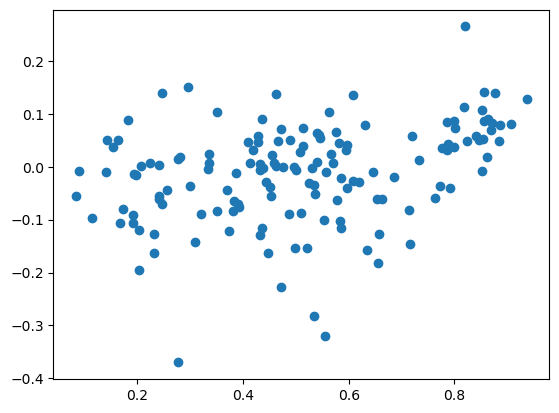

In [245]:
plt.scatter(y_test,error)
plt.show()

**Normality of Errors**

In [246]:
error.skew()

-0.698013444839525

<Axes: xlabel='cnt', ylabel='Count'>

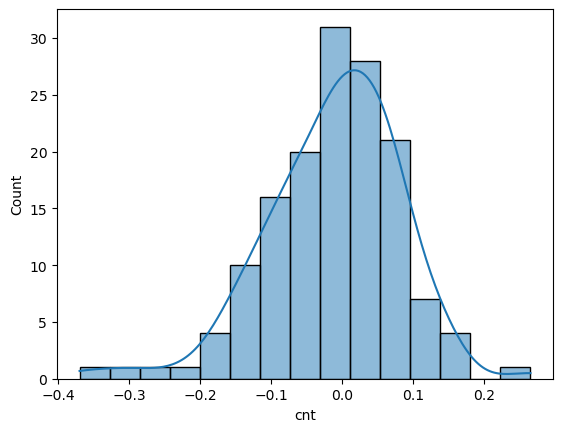

In [247]:
sns.histplot(error,kde=True)

**Equal Variance of Errors**

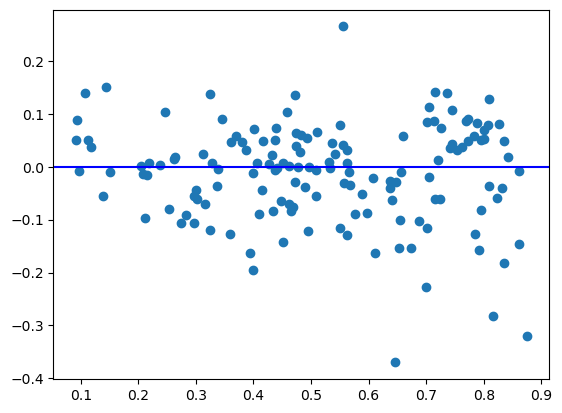

In [248]:
plt.scatter(ypred_test,error)
plt.axhline(y=0,color="blue")
plt.show()

**Variable Significance**

In [249]:
import statsmodels.formula.api as smf
model_linear=smf.ols("y~x",data=df).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     140.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          8.88e-266
Time:                        18:54:52   Log-Likelihood:                 750.41
No. Observations:                 730   AIC:                            -1443.
Df Residuals:                     701   BIC:                            -1310.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2194      0.026      8.358      0.000       0.168       0.271
x[0]           0.2328      0.007     34.761      0.000       0.220       0.246
x[1]           0.0139      0.019      0.749      0.454      -0.022       0.050
x[2]           0.0815      0.010      8.530      0.000       0.063       0.100
x[3]           0.2575      0.129      1.999      0.046       0.005       0.510
x[4]           0.1629      0.128      1.273      0.204      -0.088       0.414
x[5]          -0.1361      0.026     -5.174      0.000      -0.188      -0.084
x[6]          -0.1179      0.017     -6.742      0.000      -0.152      -0.084
x[7]          -0.0957      0.024     -3.911      0.000      -0.144      -0.048
x[8]           0.0056      0.021      0.265      0.791      -0.036       0.047
x[9]           0.0856      0.022      3.893      0.000       0.042       0.129
x[10]         -0.0521      0.009     -5.837      0.000      -0.070      -0.035
x[11]         -0.2235      0.023     -9.766      0.000      -0.268      -0.179
x[12]          0.0593      0.028      2.139      0.033       0.005       0.114
x[13]         -0.0134      0.027     -0.504      0.614      -0.065       0.039
x[14]         -0.0105      0.021     -0.503      0.615      -0.052       0.031
x[15]          0.0172      0.017      1.040      0.299      -0.015       0.050
x[16]          0.0628      0.019      3.310      0.001       0.026       0.100
x[17]          0.0525      0.028      1.848      0.065      -0.003       0.108
x[18]          0.0852      0.031      2.774      0.006       0.025       0.146
x[19]          0.0600      0.032      1.850      0.065      -0.004       0.124
x[20]          0.0040      0.036      0.111      0.912      -0.067       0.075
x[21]          0.0516      0.035      1.483      0.139      -0.017       0.120
x[22]          0.1157      0.030      3.799      0.000       0.056       0.175
x[23]          0.0369      0.011      3.331      0.001       0.015       0.059
x[24]          0.0057      0.012      0.463      0.643      -0.018       0.030
x[25]          0.0871      0.011      7.991      0.000       0.066       0.109
x[26]          0.0010      0.012      0.082      0.935      -0.023       0.025
x[27]         -0.0202      0.013     -1.613      0.107      -0.045       0.004
x[28]         -0.0089      0.012     -0.727      0.468      -0.033       0.015
==============================================================================
Omnibus:                      125.668   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.471
Skew:                          -0.860   Prob(JB):                     4.77e-77
Kurtosis:                       5.932   Cond. No.                     9.51e+15
==============================================================================

N

**AV model**
  - Partial differentiation instead of Normal Distribution

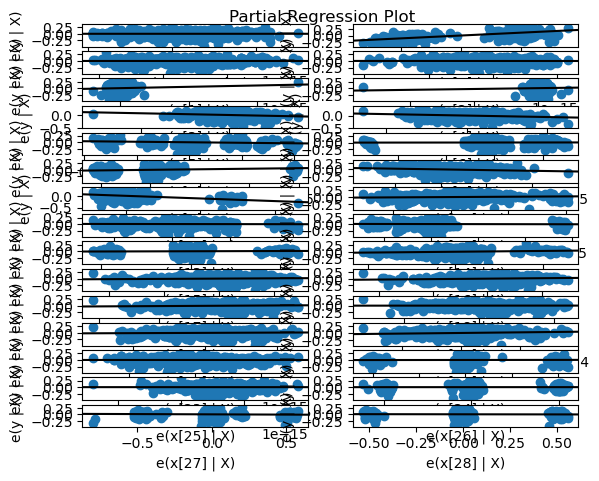

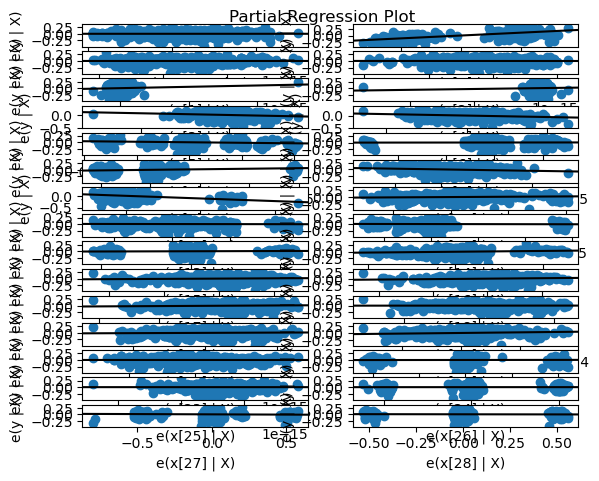

In [250]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model_linear)

**RFE(Recursive Feature Elimination)**

In [251]:
# Importing RFE
from sklearn.feature_selection import RFE

In [252]:
# Running RFE with the output number of the variable equal to 15
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

# Runninf RFE
rfe=RFE(model_linear,n_features_to_select=15)

# Fit RFE
rfe=rfe.fit(x_train,y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 13),
 ('month_12', False, 12),
 ('month_2', False, 14),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', False, 2),
 ('month_7', False, 7),
 ('month_8', False, 3),
 ('month_9', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 15),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 4),
 ('Wednesday', False, 10)]

In [253]:
# Variables suggested by RFE
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'weathersit_2', 'weathersit_3', 'month_10', 'month_3', 'month_4',
       'month_5', 'month_9', 'Monday'],
      dtype='object')

In [254]:
# Variables rejected by RFE
x_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'summer', 'month_11', 'month_12', 'month_2',
       'month_6', 'month_7', 'month_8', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

**Checking VIF**

In [255]:
# Importing the VIF and Calculate the VIF's for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(col,x_train):
    vif=pd.DataFrame()
    vif["Features"]=col
    vif["VIF"]=[variance_inflation_factor(x_train[col].values,i) for i in range(x_train[col].shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    display(vif)

In [256]:
# Creating x_train dataframe with RFE selected variables
x_train_rfe=x_train[col]

In [257]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)

In [258]:
# Running the 1st linear model
import statsmodels.api as sm
lm=sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     212.3
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.45e-221
Time:                        18:55:12   Log-Likelihood:                 597.63
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     568   BIC:                            -1093.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3297      0.028     11.797   

In [259]:
calculate_VIF(col,x_train)

Features    VIF
3            hum  17.32
2          atemp  11.20
4      windspeed   5.55
6         winter   3.09
5         spring   2.92
7   weathersit_2   2.49
0             yr   2.06
9       month_10   1.68
8   weathersit_3   1.36
11       month_4   1.36
12       month_5   1.36
10       month_3   1.27
13       month_9   1.27
14        Monday   1.18
1        holiday   1.05

**1.2 Linear Regression**

In [260]:
x_train[col]

yr  holiday     atemp       hum  windspeed  spring  winter  weathersit_2  \
362   0        0  0.242604  0.480894   0.270834       1       0             0   
264   0        0  0.624674  0.908233   0.295157       0       0             1   
134   0        0  0.599783  0.862621   0.364537       0       0             1   
460   1        0  0.409145  0.224054   0.776032       0       0             0   
448   1        0  0.470473  0.880540   0.553791       0       0             1   
..   ..      ...       ...       ...        ...     ...     ...           ...   
659   1        0  0.530137  0.473291   0.164955       0       1             0   
256   0        0  0.719101  0.641077   0.404515       0       0             0   
643   1        0  0.603092  0.598181   0.685690       0       1             0   
249   0        0  0.610585  0.927781   0.208329       0       0             0   
664   1        0  0.572392  0.670943   0.595432       0       1             1   

     weathersit_3  month_10  month_3  month_4  month_5  month_9  Monday  
362             0         0        0        0        0        0       0  
264             0         0        0        0        0        1       0  
134             0         0        0        0        1        0       1  
460             0         0        0        1        0        0       0  
448             0         0        1        0        0        0       1  
..            ...       ...      ...      ...      ...      ...     ...  
659             0         1        0        0        0        0       0  
256             0         0        0        0        0        1       0  
643             0         1        0        0        0        0       0  
249             1         0        0        0        0        1       0  
664             0         1        0        0        0        0       0  

[584 rows x 15 columns]

In [261]:
x=x_train[col].drop("holiday",axis=1)
y=df["cnt"]

In [262]:
x

yr     atemp       hum  windspeed  spring  winter  weathersit_2  \
362   0  0.242604  0.480894   0.270834       1       0             0   
264   0  0.624674  0.908233   0.295157       0       0             1   
134   0  0.599783  0.862621   0.364537       0       0             1   
460   1  0.409145  0.224054   0.776032       0       0             0   
448   1  0.470473  0.880540   0.553791       0       0             1   
..   ..       ...       ...        ...     ...     ...           ...   
659   1  0.530137  0.473291   0.164955       0       1             0   
256   0  0.719101  0.641077   0.404515       0       0             0   
643   1  0.603092  0.598181   0.685690       0       1             0   
249   0  0.610585  0.927781   0.208329       0       0             0   
664   1  0.572392  0.670943   0.595432       0       1             1   

     weathersit_3  month_10  month_3  month_4  month_5  month_9  Monday  
362             0         0        0        0        0        0       0  
264             0         0        0        0        0        1       0  
134             0         0        0        0        1        0       1  
460             0         0        0        1        0        0       0  
448             0         0        1        0        0        0       1  
..            ...       ...      ...      ...      ...      ...     ...  
659             0         1        0        0        0        0       0  
256             0         0        0        0        0        1       0  
643             0         1        0        0        0        0       0  
249             1         0        0        0        0        1       0  
664             0         1        0        0        0        0       0  

[584 rows x 14 columns]

In [263]:
y

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
725    0.240681
726    0.353543
727    0.151749
728    0.204096
729    0.311436
Name: cnt, Length: 730, dtype: float64

In [264]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


In [265]:
# Adding a constant variable
import statsmodels.api as sm
x_train_lm=sm.add_constant(x)

In [266]:
# Running the 2nd linear model
import statsmodels.api as sm
lm_2=sm.OLS(y_train,x_train_lm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     223.1
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          2.36e-220
Time:                        18:55:27   Log-Likelihood:                 592.48
No. Observations:                 584   AIC:                            -1155.
Df Residuals:                     569   BIC:                            -1089.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3300      0.028     11.716   

In [267]:
calculate_VIF(x.columns,x)

Features    VIF
2            hum  17.32
1          atemp  11.20
3      windspeed   5.54
5         winter   3.09
4         spring   2.91
6   weathersit_2   2.48
0             yr   2.06
8       month_10   1.68
7   weathersit_3   1.36
11       month_5   1.36
10       month_4   1.35
9        month_3   1.27
12       month_9   1.27
13        Monday   1.18

**1.3 Linear Regression**

In [268]:
x=x.drop("Monday",axis=1)
y=df["cnt"]

In [269]:
x

yr     atemp       hum  windspeed  spring  winter  weathersit_2  \
362   0  0.242604  0.480894   0.270834       1       0             0   
264   0  0.624674  0.908233   0.295157       0       0             1   
134   0  0.599783  0.862621   0.364537       0       0             1   
460   1  0.409145  0.224054   0.776032       0       0             0   
448   1  0.470473  0.880540   0.553791       0       0             1   
..   ..       ...       ...        ...     ...     ...           ...   
659   1  0.530137  0.473291   0.164955       0       1             0   
256   0  0.719101  0.641077   0.404515       0       0             0   
643   1  0.603092  0.598181   0.685690       0       1             0   
249   0  0.610585  0.927781   0.208329       0       0             0   
664   1  0.572392  0.670943   0.595432       0       1             1   

     weathersit_3  month_10  month_3  month_4  month_5  month_9  
362             0         0        0        0        0        0  
264             0         0        0        0        0        1  
134             0         0        0        0        1        0  
460             0         0        0        1        0        0  
448             0         0        1        0        0        0  
..            ...       ...      ...      ...      ...      ...  
659             0         1        0        0        0        0  
256             0         0        0        0        0        1  
643             0         1        0        0        0        0  
249             1         0        0        0        0        1  
664             0         1        0        0        0        0  

[584 rows x 13 columns]

In [270]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


In [271]:
# Adding a constant variable
import statsmodels.api as sm
x_train_lm=sm.add_constant(x)

In [272]:
# Running the 3rd linear model
import statsmodels.api as sm
lm_3=sm.OLS(y_train,x_train_lm).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     235.4
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          3.13e-219
Time:                        18:55:32   Log-Likelihood:                 586.98
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     570   BIC:                            -1085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3266      0.028     11.503   

In [273]:
calculate_VIF(x.columns,x)

Features    VIF
2            hum  17.09
1          atemp  11.20
3      windspeed   5.54
5         winter   3.08
4         spring   2.91
6   weathersit_2   2.46
0             yr   2.06
8       month_10   1.68
7   weathersit_3   1.35
10       month_4   1.35
11       month_5   1.35
9        month_3   1.27
12       month_9   1.27

**1.4 Linear Regression**

In [274]:
x=x.drop("winter",axis=1)
y=df["cnt"]

In [275]:
x

yr     atemp       hum  windspeed  spring  weathersit_2  weathersit_3  \
362   0  0.242604  0.480894   0.270834       1             0             0   
264   0  0.624674  0.908233   0.295157       0             1             0   
134   0  0.599783  0.862621   0.364537       0             1             0   
460   1  0.409145  0.224054   0.776032       0             0             0   
448   1  0.470473  0.880540   0.553791       0             1             0   
..   ..       ...       ...        ...     ...           ...           ...   
659   1  0.530137  0.473291   0.164955       0             0             0   
256   0  0.719101  0.641077   0.404515       0             0             0   
643   1  0.603092  0.598181   0.685690       0             0             0   
249   0  0.610585  0.927781   0.208329       0             0             1   
664   1  0.572392  0.670943   0.595432       0             1             0   

     month_10  month_3  month_4  month_5  month_9  
362         0        0        0        0        0  
264         0        0        0        0        1  
134         0        0        0        1        0  
460         0        0        1        0        0  
448         0        1        0        0        0  
..        ...      ...      ...      ...      ...  
659         1        0        0        0        0  
256         0        0        0        0        1  
643         1        0        0        0        0  
249         0        0        0        0        1  
664         1        0        0        0        0  

[584 rows x 12 columns]

In [276]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


In [277]:
# Adding a constant variable
import statsmodels.api as sm
x_train_lm=sm.add_constant(x)

In [278]:
# Running the 4th linear model
import statsmodels.api as sm
lm_4=sm.OLS(y_train,x_train_lm).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     251.5
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          8.13e-219
Time:                        18:55:36   Log-Likelihood:                 583.14
No. Observations:                 584   AIC:                            -1140.
Df Residuals:                     571   BIC:                            -1083.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3709      0.024     15.775   

In [279]:
calculate_VIF(x.columns,x)

Features    VIF
2            hum  12.22
1          atemp   8.73
3      windspeed   5.00
5   weathersit_2   2.34
4         spring   2.19
0             yr   1.97
6   weathersit_3   1.30
7       month_10   1.28
8        month_3   1.26
11       month_9   1.26
10       month_5   1.24
9        month_4   1.23

**1.5 Linear Regression**

In [280]:
x=x.drop("month_4",axis=1)
y=df["cnt"]

In [281]:
x

yr     atemp       hum  windspeed  spring  weathersit_2  weathersit_3  \
362   0  0.242604  0.480894   0.270834       1             0             0   
264   0  0.624674  0.908233   0.295157       0             1             0   
134   0  0.599783  0.862621   0.364537       0             1             0   
460   1  0.409145  0.224054   0.776032       0             0             0   
448   1  0.470473  0.880540   0.553791       0             1             0   
..   ..       ...       ...        ...     ...           ...           ...   
659   1  0.530137  0.473291   0.164955       0             0             0   
256   0  0.719101  0.641077   0.404515       0             0             0   
643   1  0.603092  0.598181   0.685690       0             0             0   
249   0  0.610585  0.927781   0.208329       0             0             1   
664   1  0.572392  0.670943   0.595432       0             1             0   

     month_10  month_3  month_5  month_9  
362         0        0        0        0  
264         0        0        0        1  
134         0        0        1        0  
460         0        0        0        0  
448         0        1        0        0  
..        ...      ...      ...      ...  
659         1        0        0        0  
256         0        0        0        1  
643         1        0        0        0  
249         0        0        0        1  
664         1        0        0        0  

[584 rows x 11 columns]

In [282]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


In [283]:
# Adding a constant variable
import statsmodels.api as sm
x_train_lm=sm.add_constant(x)

In [284]:
# Running the 5th linear model
import statsmodels.api as sm
lm_5=sm.OLS(y_train,x_train_lm).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     274.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          4.81e-220
Time:                        18:55:40   Log-Likelihood:                 583.13
No. Observations:                 584   AIC:                            -1142.
Df Residuals:                     572   BIC:                            -1090.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3707      0.023     15.899   

In [285]:
calculate_VIF(x.columns,x)

Features    VIF
2            hum  12.20
1          atemp   8.69
3      windspeed   4.60
5   weathersit_2   2.34
4         spring   2.06
0             yr   1.96
6   weathersit_3   1.29
7       month_10   1.25
8        month_3   1.25
10       month_9   1.24
9        month_5   1.21

**1.6 Linear Regression**

In [286]:
x=x.drop("month_5",axis=1)
y=df["cnt"]

In [287]:
x

yr     atemp       hum  windspeed  spring  weathersit_2  weathersit_3  \
362   0  0.242604  0.480894   0.270834       1             0             0   
264   0  0.624674  0.908233   0.295157       0             1             0   
134   0  0.599783  0.862621   0.364537       0             1             0   
460   1  0.409145  0.224054   0.776032       0             0             0   
448   1  0.470473  0.880540   0.553791       0             1             0   
..   ..       ...       ...        ...     ...           ...           ...   
659   1  0.530137  0.473291   0.164955       0             0             0   
256   0  0.719101  0.641077   0.404515       0             0             0   
643   1  0.603092  0.598181   0.685690       0             0             0   
249   0  0.610585  0.927781   0.208329       0             0             1   
664   1  0.572392  0.670943   0.595432       0             1             0   

     month_10  month_3  month_9  
362         0        0        0  
264         0        0        1  
134         0        0        0  
460         0        0        0  
448         0        1        0  
..        ...      ...      ...  
659         1        0        0  
256         0        0        1  
643         1        0        0  
249         0        0        1  
664         1        0        0  

[584 rows x 10 columns]

In [288]:
#Modelling
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression()
model_linear.fit(x_train,y_train)

print("Intercept:",model_linear.coef_)
print("coefficient:",model_linear.intercept_)

#Prediction & Evaluation on train data
ypred_train=model_linear.predict(x_train)
print("Train R2 score",r2_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_linear.predict(x_test)
print("Test R2 score",r2_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_linear,x_train,y_train,cv=5).mean())

Intercept: [ 2.33681987e-01  1.22817850e+13  1.22817850e+13 -1.46483221e-02
  4.47142145e-01 -1.44145393e-01 -1.04509381e-01 -8.10130892e-02
  2.93240588e-02  8.83061515e-02 -5.16202483e-02 -2.31162152e-01
  6.90453890e-02 -7.01387455e-03 -1.12690447e-03  7.39889828e-03
  7.59770910e-02  4.32485504e-02  7.89684377e-02  5.99267582e-02
  4.42751871e-02  7.30526244e-02  1.27988809e-01  1.22817850e+13
 -1.82122560e-04  1.22817850e+13 -9.69451830e-03 -3.41460943e-02
 -1.55873744e-02]
coefficient: -12281784960483.672
Train R2 score 0.8516870708049115
Test R2 score 0.8129746566980415
cv: 0.833595331417494


In [289]:
# Adding a constant variable
import statsmodels.api as sm
x_train_lm=sm.add_constant(x)

In [290]:
# Running the 6th linear model
import statsmodels.api as sm
lm_6=sm.OLS(y_train,x_train_lm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     297.9
Date:                Fri, 02 Aug 2024   Prob (F-statistic):          1.46e-219
Time:                        18:55:44   Log-Likelihood:                 579.06
No. Observations:                 584   AIC:                            -1136.
Df Residuals:                     573   BIC:                            -1088.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3670      0.023     15.670   

In [291]:
calculate_VIF(x.columns,x)

Features    VIF
2           hum  11.92
1         atemp   8.68
3     windspeed   4.60
5  weathersit_2   2.34
4        spring   2.02
0            yr   1.96
6  weathersit_3   1.29
8       month_3   1.24
7      month_10   1.21
9       month_9   1.20